Emojis

In [ ]:
import re

# Emoji pattern using Unicode ranges
emoji_pattern = re.compile("[\U0001F600-\U0001F64F"  # Emoticons
                           "\U0001F300-\U0001F5FF"  # Symbols & pictographs
                           "\U0001F680-\U0001F6FF"  # Transport & map
                           "\U0001F1E0-\U0001F1FF"  # Flags
                           "\U00002700-\U000027BF"  # Dingbats
                           "\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)

# Count emoji occurrences per row in the 'review' column
df['emoji_count'] = df['review'].apply(lambda x: len(emoji_pattern.findall(str(x))))

# Total emojis in dataset
total_emojis = df['emoji_count'].sum()
print("Total emojis in dataset:", total_emojis)


Total emojis in dataset: 400


In [ ]:
records_with_emojis = df[df['emoji_count'] > 0].shape[0]
print("Records containing emojis:", records_with_emojis)


Records containing emojis: 226


In [ ]:
# Records that contain at least one emoji
df_emojis = df[df['emoji_count'] > 0]

# Records without emojis
df_no_emojis = df[df['emoji_count'] == 0]
df_emojis.to_excel('../data/interim/edeka_with_emojis.xlsx', index=False)
df_no_emojis.to_excel('../data/interim/edeka_without_emojis.xlsx', index=False)

print("Saved files to data/interim/")


Saved files to data/interim/


Without Emojis further cleaning

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


df = pd.read_excel('../data/interim/edeka_without_emojis.xlsx')


stop_words = set(stopwords.words('english'))


def clean_text(text):
    if not isinstance(text, str):
        return ""
 
    text = text.lower()
   
    text = re.sub(r'[^\w\s]', '', text)
   
    text = re.sub(r'\d+', '', text)
   
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply to review column
df['cleaned_review'] = df['review'].apply(clean_text)

# Preview
print(df[['review', 'cleaned_review']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  \
0                                       wrong number   
1  "Unfortunately, I had a very bad experience at...   
2  "Unfortunately, I had a very bad experience at...   
3  "Unfortunately, I had a very bad experience at...   
4  "Very nice staff" may be acceptable, *but* the...   

                                      cleaned_review  
0                                       wrong number  
1  unfortunately bad experience edeka every time ...  
2  unfortunately bad experience edeka every time ...  
3  unfortunately bad experience edeka every time ...  
4  nice staff may acceptable owner hired parking ...  


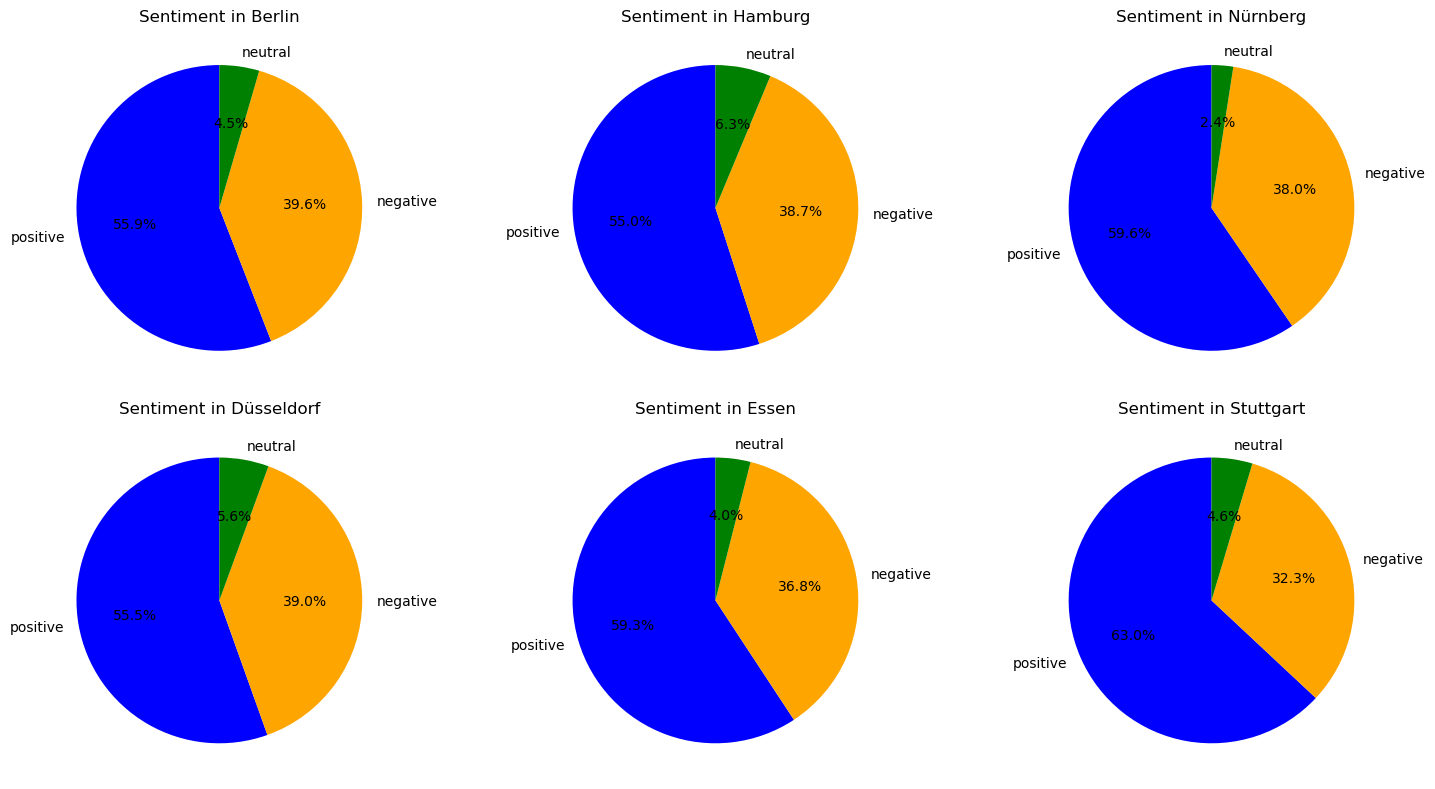

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("../data/interim/edeka_without_emojis.xlsx")

# Define top N cities by review count
top_cities = df['city'].value_counts().head(6).index  # You can change to head(10) if needed

# Setup subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Adjust rows/cols based on number of cities
axes = axes.flatten()

# Generate pie chart for each city
for i, city in enumerate(top_cities):
    city_data = df[df['city'] == city]['sentiment'].value_counts()
    axes[i].pie(
        city_data,
        labels=city_data.index,
        autopct='%1.1f%%',
        colors=['blue', 'orange', 'green'],
        startangle=90
    )
    axes[i].set_title(f"Sentiment in {city}")

# Hide unused axes if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
merged = df.join(evidence_df.set_index('index'), how='left')
exploded = merged.explode('accusations').dropna(subset=['accusations'])
pivot = exploded.groupby(['chain','accusations']).size().unstack(fill_value=0)
pivot


accusations,Discriminatory treatment / profiling,Excessive plastic packaging / sustainability issues,Expired or spoiled products on shelves,Food waste and environmental irresponsibility,Misleading price labelling or overpricing,Poor customer service or rude staff,Self-checkout malfunctions and double charges,Supplier exploitation or unfair trade practices,Unhygienic store conditions,Violation of workers’ rights / understaffing
chain,,,,,,,,,,
CAP,0,0,0,0,0,13,0,0,0,0
E,4,27,39,12,49,332,55,2,14,7
EDEKA,107,120,319,52,490,3192,265,33,130,138
EKZ,0,0,3,0,0,7,0,0,0,0
Edeka,0,6,68,2,82,463,27,4,4,4
Felix,0,0,4,0,4,25,0,0,6,4
Frischemarkt,6,0,0,0,8,30,0,0,0,0
MARKTKAUF,2,0,0,0,2,24,6,3,0,4
Marktkauf,0,2,5,3,21,34,1,0,6,0


In [ ]:
flags = pd.Series(False, index=df.index)
flags |= df.duplicated(subset=['cleaned_review'], keep=False)                 # exact dupes
flags |= ((df['cleaned_review'].str.len() < 20) & df['rating'].isin([1,5]))  # short extremes
flags |= df.duplicated(subset=['date','rating','cleaned_review'], keep=False)

suspects = df[flags]
print(f"{len(suspects)} potential fake reviews.")
suspects.head()


11505 potential fake reviews.


,date,review,rating,store,address,city,latitude,longitude,sentiment,theme_tra,cateex_tra,cat_tra,emoji_count,cleaned_review,had_stopwords,chain,text_lc
1,2024-10-02 16:34:34,"""Unfortunately, I had a very bad experience at...",1,EDEKA Feuerbach - Stuttgart,"Grazer Str. 34, 70469 Stuttgart, Deutschland",Stuttgart,48.810098,9.160096,negative,Handling,Technological aspects and functionality (e.g. ...,Technological aspects and functionality,0,unfortunately bad experience edeka every time ...,True,EDEKA,unfortunately bad experience edeka every time ...
2,2024-10-02 16:34:34,"""Unfortunately, I had a very bad experience at...",1,EDEKA Feuerbach - Stuttgart,"Grazer Str. 34, 70469 Stuttgart, Deutschland",Stuttgart,48.810098,9.160096,negative,Handling,Shopping experience and atmosphere,Shopping experience and atmosphere,0,unfortunately bad experience edeka every time ...,True,EDEKA,unfortunately bad experience edeka every time ...
3,2024-10-02 16:34:34,"""Unfortunately, I had a very bad experience at...",1,EDEKA Feuerbach - Stuttgart,"Grazer Str. 34, 70469 Stuttgart, Deutschland",Stuttgart,48.810098,9.160096,negative,Customer service,Customer service and employee friendliness (e....,Customer service and employee friendliness,0,unfortunately bad experience edeka every time ...,True,EDEKA,unfortunately bad experience edeka every time ...
4,2025-02-03 22:13:50,"""Very nice staff"" may be acceptable, *but* the...",1,EDEKA Christian Berndt e.K. - Hamburg,"Koppelstraße 47-49, 22529 Hamburg, Deutschland",Hamburg,53.593212,9.944485,positive,Personal,Customer service and employee friendliness (e....,Customer service and employee friendliness,0,nice staff may acceptable owner hired parking ...,True,EDEKA,nice staff may acceptable owner hired parking ...
5,2025-02-03 22:13:50,"""Very nice staff"" may be acceptable, *but* the...",1,EDEKA Christian Berndt e.K. - Hamburg,"Koppelstraße 47-49, 22529 Hamburg, Deutschland",Hamburg,53.593212,9.944485,negative,Parking space management,Store layout and infrastructure (e.g. product ...,Store layout and infrastructure,0,nice staff may acceptable owner hired parking ...,True,EDEKA,nice staff may acceptable owner hired parking ...


In [4]:
%pip install -q nltk scikit-learn textblob matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
ACCUSATIONS = {
    "rude staff / poor service": [
        "rude","unfriendly","disrespect","customer service","incompetent","unprofessional"
    ],
    "profiling or discrimination": [
        "suspect","bag check","security followed","profiling","discrimination","treated like a thief"
    ],
    "misleading price / overcharge": [
        "overcharge","wrong price","too expensive","price difference","rip-off"
    ],
    "expired / spoiled goods": [
        "expired","rotten","mold","past date","stale","off smell"
    ],
    "dirty / unhygienic store": [
        "dirty","filthy","rats","cockroach","unclean","bad smell"
    ],
    "excessive plastic / waste": [
        "plastic","packaging","environment","waste","sustainability"
    ],
    "self-checkout problems": [
        "self-checkout","scanner","double charged","checkout error","machine broken"
    ],
    "understaffed / long queues": [
        "understaffed","overworked","long queue","only one cashier","waiting time"
    ],
}





In [ ]:
import re, random, json, itertools
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from textblob import TextBlob

# first-time NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# --- quick clean ---
df = df.copy()                                   # keep original intact
if df['date'].dtype != 'datetime64[ns]':
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

if 'chain' not in df.columns:                    # extract “EDEKA”, “REWE”, etc.
    df['chain'] = df['store'].str.extract(r'^(\w+)')

df['text_lc'] = df['cleaned_review'].fillna('').str.lower()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def accusations_in_text(text: str) -> list[str]:
    hits = []
    for acc, kws in ACCUSATIONS.items():
        if any(kw in text for kw in kws):
            hits.append(acc)
    return hits

evidence_rows = []
for idx, txt in df['text_lc'].items():
    found = accusations_in_text(txt)
    if found:
        evidence_rows.append({"index": idx, "accusations": found})

evidence_df = pd.DataFrame(evidence_rows)
print(f"🔎 Evidence in {len(evidence_df)} of {len(df)} reviews")


🔎 Evidence in 2263 of 12688 reviews


In [23]:
df.head(10)

,date,store,cleaned_review,rating,theme_tra,cateex_tra,cat_tra,chain,text_lc,fake_flag,polarity
0,2025-01-24 19:12:19,EDEKA Sapphire,wrong number,2,[Dissatisfaction with phone number],[Customer service and employee friendliness (e...,[Customer service and employee friendliness],EDEKA Sapphire,wrong number,False,-0.500000
1,2024-10-02 16:34:34,EDEKA Feuerbach - Stuttgart,unfortunately bad experience edeka every time ...,1,"[Handling, Customer service]",[Technological aspects and functionality (e.g....,"[Technological aspects and functionality, Shop...",EDEKA Feuerbach - Stuttgart,unfortunately bad experience edeka every time ...,False,-0.433333
2,2025-02-03 22:13:50,EDEKA Christian Berndt e.K. - Hamburg,nice staff may acceptable owner hired parking ...,1,"[Personal, Parking space management]",[Customer service and employee friendliness (e...,"[Customer service and employee friendliness, S...",EDEKA Christian Berndt e.K. - Hamburg,nice staff may acceptable owner hired parking ...,False,0.175000
3,2024-11-27 05:42:57,EDEKA Foodservice Bielefeld,freezing roundabout right edeka sign along nar...,4,[Location description],"[Access, location and accessibility (e.g. acce...","[Access, location and accessibility]",EDEKA Foodservice Bielefeld,freezing roundabout right edeka sign along nar...,False,0.014286
4,2024-11-10 00:12:44,EDEKA,wide range products scarce staff case asking q...,3,"[Product range, Prices, Personal]",[Product availability and quality (e.g. fish c...,"[Product availability and quality, Pricing pol...",EDEKA,wide range products scarce staff case asking q...,False,0.075000
5,2025-02-04 14:50:40,Edeka Simmel Dresden Wiener Platz,friendly working staff overview available also...,5,"[Accessibility, Service, Clarity]","[Access, location and accessibility (e.g. acce...","[Access, location and accessibility, Customer ...",Edeka Simmel Dresden Wiener Platz,friendly working staff overview available also...,False,0.441667
6,2025-01-02 15:25:55,nah & gut Dresden,expensive rewe opposite confusing takes foreve...,1,"[Personal, Special prices, Prices, Quiet, Conf...",[Customer service and employee friendliness (e...,"[Customer service and employee friendliness, P...",nah & gut Dresden,expensive rewe opposite confusing takes foreve...,False,0.089935
7,2024-10-03 10:07:27,EDEKA Brüning & Tochter,supermarket,3,[cleanliness],[Hygiene and cleanliness (e.g. cleanliness)],[Hygiene and cleanliness],EDEKA Brüning & Tochter,supermarket,True,0.000000
8,2025-02-07 17:46:35,EDEKA Center Berlin – Streitstraße,good shop nice staff,4,[Personal],[Customer service and employee friendliness (e...,[Customer service and employee friendliness],EDEKA Center Berlin – Streitstraße,good shop nice staff,False,0.650000
9,2024-12-10 15:09:37,EDEKA Center,milk uht milk shopping cart actually went sour...,1,[Service],[Customer service and employee friendliness (e...,[Customer service and employee friendliness],EDEKA Center,milk uht milk shopping cart actually went sour...,False,-0.075000


In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('../data/interim/edeka_without_emojis.xlsx')

# Display basic info
print("Initial shape:", df.shape)
print("Missing values per column:\n", df.isnull().sum())

Initial shape: (12688, 15)
Missing values per column:
 date              0
review            0
rating            0
store             0
address           0
city              0
latitude          0
longitude         0
sentiment         0
theme_tra         0
cateex_tra        5
cat_tra           0
emoji_count       0
cleaned_review    8
had_stopwords     0
dtype: int64


In [ ]:
%pip install --upgrade sentence-transformers



^C
Note: you may need to restart the kernel to use updated packages.


  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/10.5 MB 5.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/10.5 MB 6.3 MB/s eta 0:00:02
   -------------------- ------------------- 5.2/10.5 MB 8.4 MB/s eta 0:00:01
   --------------------------------- ------ 8.7/10.5 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 10.5/10.5 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 23.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
    --------------------------------------- 3.4/216.1 MB 15.5 MB/s eta 0:00:14
   - -------------------------------------- 7.9/216.1 MB 18.7 MB/s eta 0:00:12
   -- ---------------------

In [ ]:


import pandas as pd
from sentence_transformers import SentenceTransformer, util

reviews = pd.read_excel('../data/interim/edeka_reviews_wide.xlsx')

master_accusations = [
    "Defective cooling, mice infestation and mold—severe hygiene breaches",
    "Massive cleanliness failures exposed in undercover reports",
    "Ignoring human-rights and labor violations in supplier plantations",
    "Alleged breaches of Germany’s supply-chain law: underpaid labor and unsafe conditions",
    "Environmental destruction and rights abuses on palm-oil plantations",
    "Misleading use of RSPO eco-label despite rights and environmental breaches",
    "Product-safety hazard: metal fragments found in packaged food",
    "Illegal internal surveillance and “spy” operations against employees",
    "Poor transparency, labor and women’s rights violations, neglect of small-scale producers",
    "Intransparent discount schemes—special app-only prices not clearly disclosed",
    "Excessive single-use packaging and lack of reuse options",
    "Misleading bonus-app presentation: discounts shown without final prices",
    "Raised minimum-spend thresholds for coupon redemption, disadvantaging shoppers",
    "Charging customers for the weight of packaging (bag weight passed onto buyer)",
    "Bonus-app only displays discount amounts, not original prices—considered deceptive",
    "Privacy violations: unauthorized collection of employee medical and personal data",
    "Secret price-fixing agreements leading to hefty fines",
    "Abuse of market power: anticompetitive retaliation via antitrust complaints",
    "Overuse of single-use plastics despite sustainability pledges",
    "Investigations into possible price-collusion among discounters",
    "High rates of plastic packaging in produce aisles",
    "Collusion among potato processors to fix prices, hurting consumers",
    "Hygiene breaches",
    "Overpricing & hidden fees",
    "Misleading discounts & promotions",
    "Rude or understaffed service",
    "Infrastructure & safety failures",
    "Product quality issues",
    "Stock shortages",
    "False or confusing store info",
    "Privacy & data misuse",
    "Discrimination & accessibility failures",
  
]

themes   = reviews["theme_tra"].dropna().unique().tolist()
cateexs  = reviews["cateex_tra"].dropna().unique().tolist()
cats     = reviews["cat_tra"].dropna().unique().tolist()


model     = SentenceTransformer("all-MiniLM-L6-v2")
label_emb = model.encode(master_accusations, convert_to_tensor=True)
theme_emb = model.encode(themes,              convert_to_tensor=True)
cateex_emb= model.encode(cateexs,             convert_to_tensor=True)
cat_emb   = model.encode(cats,                convert_to_tensor=True)

# Helper to build a mapping from any list of keys → master_accusations
def build_mapping(keys, key_embs):
  
    sims = util.cos_sim(key_embs, label_emb)  
    mapping = {}
    for i, k in enumerate(keys):
        best = int(sims[i].argmax())
        mapping[k] = master_accusations[best]
    return mapping


theme_to_acc   = build_mapping(themes,   theme_emb)
cateex_to_acc  = build_mapping(cateexs,  cateex_emb)
cat_to_acc     = build_mapping(cats,     cat_emb)


for k in themes[:5]:
    print(f"theme {k!r} → {theme_to_acc[k]}")
    

reviews["acc_theme"]  = reviews["theme_tra"].map(theme_to_acc)
reviews["acc_cateex"] = reviews["cateex_tra"].map(cateex_to_acc)
reviews["acc_cat"]    = reviews["cat_tra"].map(cat_to_acc)


reviews["acc_list"] = (
    reviews[["acc_theme","acc_cateex","acc_cat"]]
    .apply(lambda row: [a for a in row if pd.notna(a)], axis=1)
)

exploded = (
    reviews[["acc_list"]]
    .explode("acc_list")
    .reset_index()
    .rename(columns={"index":"review_idx","acc_list":"accusation"})
)
exploded = exploded.drop_duplicates(subset=["review_idx","accusation"])


counts = exploded["accusation"].value_counts()
print("\nTotal reviews per accusation:\n", counts)


if "chain" in reviews.columns:
    pivot = (
        exploded
        .merge(reviews[["chain"]], left_on="review_idx", right_index=True)
        .pivot_table(
            index="accusation",
            columns="chain",
            aggfunc="size",
            fill_value=0
        )
    )
    print("\nReviews per accusation by chain:\n", pivot)


theme "['Willingness to help', 'shopping experience', 'friendliness']" → Discrimination & accessibility failures
theme "['Fruit', 'Vegetables', 'The checkout', 'Prices', 'Selection']" → High rates of plastic packaging in produce aisles
theme "['Customer service', 'Waiting times']" → Rude or understaffed service
theme "['Assortment', 'Service']" → Excessive single-use packaging and lack of reuse options
theme "['Parking lot surveillance']" → Illegal internal surveillance and “spy” operations against employees

Total reviews per accusation:
 accusation
False or confusing store info                                                               1656
Product quality issues                                                                      1363
Rude or understaffed service                                                                1239
Stock shortages                                                                             1061
Hygiene breaches                                       

In [44]:
# ── Step 0: if you haven’t installed transformers yet ───────
%pip install -q transformers


Note: you may need to restart the kernel to use updated packages.


top_accusation             Bad shopping atmosphereprices  \
city                                                       
Berlin                                                91   
Bielefeld                                             28   
Bochum                                                20   
Bonn                                                  60   
Bremen                                                49   
Dortmund                                              58   
Dresden                                               39   
Duisburg                                              27   
Düsseldorf                                            86   
Essen                                                 58   
Hamburg                                               75   
Hannover                                              64   
Köln                                                  61   
Leipzig                                               17   
Main                                    

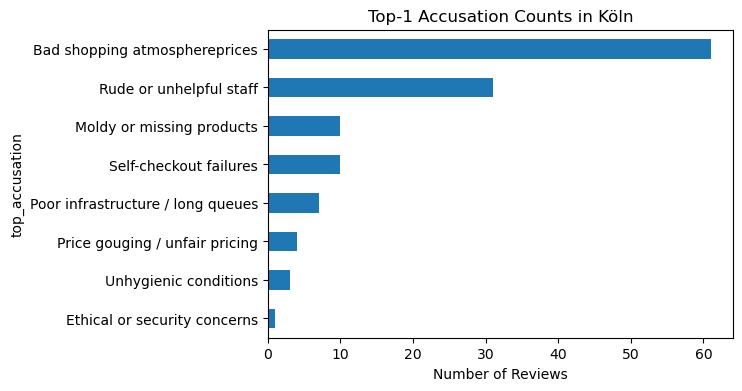

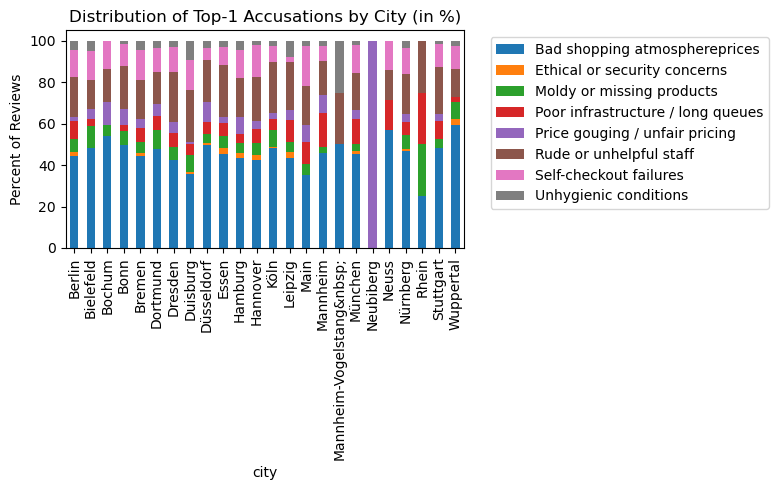

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Count of each top_accusation per city
city_counts = df.groupby(['city','top_accusation']).size().unstack(fill_value=0)
print(city_counts)

# 2) Normalize to get % within each city
city_pct = city_counts.div(city_counts.sum(axis=1), axis=0) * 100
print(city_pct)

# 3) Plot the top‐3 most frequent accusations in each city
top3_per_city = city_pct.apply(lambda row: row.nlargest(3).index.tolist(), axis=1)
print("Top-3 accusations per city:")
print(top3_per_city)

# 4) Bar‐chart of absolute counts for one example city (e.g. "Köln")
plt.figure(figsize=(6,4))
city = "Köln"
city_counts.loc[city].sort_values(ascending=True).plot.barh()
plt.title(f"Top‐1 Accusation Counts in {city}")
plt.xlabel("Number of Reviews")
plt.show()

# 5) Stacked %‐bar chart for all cities
city_pct.plot(kind='bar', stacked=True, figsize=(8,5), legend=False)
plt.title("Distribution of Top‐1 Accusations by City (in %)")
plt.ylabel("Percent of Reviews")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import ast
import yaml
import re
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import joblib
from pathlib import Path
import numpy as np

# ---- File paths ----
INFILE = "../data/interim/processed/edeka_reviews_wide.xlsx"         # <-- Set this!
OUTFILE = "../data/interim/final_analysis.xlsx"
LABELS_YAML = "config/labels.yml"
EMBED_MODEL = "all-MiniLM-L6-v2"

# ---- Load Data ----
df = pd.read_excel(INFILE)

def safe_list(x):
    if isinstance(x, list): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except Exception: return []
    return []

# Apply to each relevant column
for col in ["theme_tra", "cateex_tra", "cat_tra"]:
    if col in df.columns:
        df[col] = df[col].apply(safe_list)
    else:
        df[col] = [[]]*len(df)

# ---- Combine all 3 for accusations ----
def combine_labels(row):
    labels = set()
    for col in ["cat_tra", "cateex_tra", "theme_tra"]:
        vals = row[col]
        if col == "cateex_tra":
            vals = [v.split(" (")[0].strip() for v in vals]
        labels.update([v.strip() for v in vals if v.strip()])
    return list(labels)

df["accusations"] = df.apply(combine_labels, axis=1)
df["cleaned_review"] = df["cleaned_review"].fillna("")

# ---- Load canonical label list ----
with open(LABELS_YAML, "r", encoding="utf-8") as f:
    all_labels = yaml.safe_load(f)

# ---- Embedding ----
embedder = SentenceTransformer(EMBED_MODEL)
X = embedder.encode(df["cleaned_review"].tolist(), convert_to_tensor=False, show_progress_bar=True)

# ---- MultiLabel binarizer and classifier ----
mlb = MultiLabelBinarizer(classes=all_labels)
Y = mlb.fit_transform(df["accusations"])

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, class_weight="balanced"))
clf.fit(X, Y)

# ---- Save model bundle ----
Path("models").mkdir(exist_ok=True)
bundle = {"embedder_name": EMBED_MODEL, "mlb": mlb, "clf": clf}
joblib.dump(bundle, "models/multilabel_model.joblib")

# ---- Classifier predictions ----
proba = clf.predict_proba(X)
THRESHOLD = 0.8
TOP_K = 3
predicted = []
for row in proba:
    labs = [lab for lab, p in zip(mlb.classes_, row) if p >= THRESHOLD]
    if not labs:
        labs = [mlb.classes_[i] for i in row.argsort()[-TOP_K:][::-1]]
    predicted.append(labs)
df["predicted_accusations"] = predicted

# ---- Semantic Top-1/Top-3 using fixed list (OPTIONAL) ----
semantic_labels = [
    "Overpricing & hidden fees", "Bad shopping atmosphere", "False or confusing store info",
    "Rude or understaffed service", "Product quality issues", "Defective cooling, mice infestation and mold—severe hygiene breaches",
    "Hygiene breaches", "Discrimination & accessibility failures", "Misleading discounts & promotions",
    "Infrastructure & safety failures", "Self-checkout failures", "Ethical or security concerns",
    "Price gouging / unfair pricing", "Moldy or missing products", "Poor infrastructure / long queues", "prices"
]
label_emb = embedder.encode(semantic_labels, convert_to_tensor=True)
X_tensor = embedder.encode(df["cleaned_review"].tolist(), convert_to_tensor=True)
cos_cleaned = util.cos_sim(X_tensor, label_emb)

# Top-1
top1_idx = cos_cleaned.argmax(dim=1)
top1_score = cos_cleaned.max(dim=1).values
df['top_accusation'] = [semantic_labels[i] for i in top1_idx]
df['top_acc_score'] = top1_score.cpu().numpy().round(3)

# Top-3
topk = cos_cleaned.topk(k=3, dim=1)
df['top3_accusations'] = [
    [semantic_labels[i] for i in row] for row in topk.indices.cpu().tolist()
]
df['top3_acc_scores'] = [
    [round(float(s), 3) for s in row] for row in topk.values.cpu().tolist()
]

# Full ranked list
review_labels, review_scores = zip(*[
    ( [semantic_labels[i] for i in row.argsort(descending=True).cpu().numpy()], 
      [round(float(x), 3) for x in sorted(row.cpu().numpy(), reverse=True)])
    for row in cos_cleaned
])
df['review_accusations'] = review_labels
df['review_acc_scores'] = review_scores

# ---- Keyword matching ----
keywords = [
    "defective cooling","mold contamination","mice infestation","underpaid labor","human[- ]rights violations",
    "deforestation","single[- ]use plastics","hidden fees","misleading promotions","price gouging",
    "illegal employee monitoring","privacy breach","long checkout queues","broken self[- ]checkout",
    "out[- ]of[- ]stock items","torn packaging","antitrust complaints","market[- ]power abuse","prices"
]
patterns = [re.compile(r'\b'+kw+r'\b', flags=re.IGNORECASE) for kw in keywords]

def find_keywords_across(row):
    texts = [
        row.get('review','') or '',
        row.get('cleaned_review','') or ''
    ]
    for col in ('theme_tra','cat_tra','cateex_tra','accusations'):
        val = row.get(col)
        if isinstance(val, list):
            texts.append(" ".join(val))
        elif isinstance(val, str):
            texts.append(val)
    hits = {kw for text in texts for kw,pat in zip(keywords,patterns) if pat.search(text)}
    return list(hits)

def find_keywords_in_review(text):
    return [kw for kw,pat in zip(keywords,patterns) if pat.search(text or "")]

df['matched_keywords'] = df.apply(find_keywords_across, axis=1)
df['keyword_count'] = df['matched_keywords'].str.len()
df['review_matched_keywords'] = df['Translated_review2'].apply(find_keywords_in_review)
df['review_keyword_count'] = df['review_matched_keywords'].str.len()

# ---- Output columns (order matches your sample) ----
columns = [
    'date', 'Translated_review2', 'rating', 'store', 'address', 'city', 'latitude', 'longitude',
    'sentiment', 'emoji_count', 'cleaned_review', 'Has_Stop_word',
    'theme_tra', 'cateex_tra', 'cat_tra', 'accusations',
    'top_accusation', 'top_acc_score', 'top3_accusations', 'top3_acc_scores',
    'review_accusations', 'review_acc_scores',
    'matched_keywords', 'keyword_count', 'review_matched_keywords', 'review_keyword_count'
]
for col in columns:
    if col not in df.columns:
        df[col] = np.nan

# ---- Save ----
df[columns].to_excel(OUTFILE, index=False)
print(f"✅ Output written to {OUTFILE}")

Batches: 100%|██████████| 163/163 [00:30<00:00,  5.34it/s]
c:\Users\hassa\anaconda3\envs\data-project\lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['#VALUE!', '- Fish', '- and cheese counter', '24 hour opening', '24 hour opening hours', '24 hour service', 'A hallway', 'A room', 'ATM', 'Acceptance of empties', 'Acceptance of notes', 'Acceptance of payment', 'Acceptance of payment methods', 'Access', 'Access Restriction', 'Access to the drugstore', 'Access to the market', 'Access to the parking garage', 'Access to the pharmacy', 'Access to toilet', 'Access, location and accessibility', 'Accessibility', 'Accessibility of articles', 'Accessibility of products', 'Accessibility of standard foods', 'Accessibility of the goods', 'Accommodation', 'Actions', 'Activities', 'Activities for children', 'Actuality', 'Advertising', 'Advertising announcements', 'Advice', 'Affordable baked goods', 'Affordable prices', 'Affordable products', 'Age of the customer',

✅ Output written to ../data/interim/final_analysis.xlsx


In [8]:
import pandas as pd
import ast
import yaml
import re
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import joblib
from pathlib import Path
import numpy as np

# ---- File paths ----
INFILE = "../data/interim/processed/edeka_reviews_wide.xlsx"
OUTFILE = "../data/interim/final_analysis.xlsx"
LABELS_YAML = "config/labels.yml"
EMBED_MODEL = "all-MiniLM-L6-v2"

# ---- Thresholds (Set here!) ----
THRESHOLD = 0.7           # Classifier probability threshold
TOP_K = 3                 # Fallback to top-K if nothing passes threshold
SEMANTIC_THRESHOLD = 0.6  # Cosine similarity for semantic accusations

# ---- Load Data ----
df = pd.read_excel(INFILE)

def safe_list(x):
    if isinstance(x, list): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except Exception: return []
    return []

for col in ["theme_tra", "cateex_tra", "cat_tra"]:
    if col in df.columns:
        df[col] = df[col].apply(safe_list)
    else:
        df[col] = [[]]*len(df)

# ---- Combine all 3 for accusations ----
def combine_labels(row):
    labels = set()
    for col in ["cat_tra", "cateex_tra", "theme_tra"]:
        vals = row[col]
        if col == "cateex_tra":
            vals = [v.split(" (")[0].strip() for v in vals]
        labels.update([v.strip() for v in vals if v.strip()])
    return list(labels)

df["accusations"] = df.apply(combine_labels, axis=1)
df["cleaned_review"] = df["cleaned_review"].fillna("")

# ---- Load canonical label list ----
with open(LABELS_YAML, "r", encoding="utf-8") as f:
    all_labels = yaml.safe_load(f)

# ---- Embedding ----
embedder = SentenceTransformer(EMBED_MODEL)
X = embedder.encode(df["cleaned_review"].tolist(), convert_to_tensor=False, show_progress_bar=True)

# ---- MultiLabel binarizer and classifier ----
mlb = MultiLabelBinarizer(classes=all_labels)
Y = mlb.fit_transform(df["accusations"])

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, class_weight="balanced"))
clf.fit(X, Y)

# ---- Save model bundle ----
Path("models").mkdir(exist_ok=True)
bundle = {"embedder_name": EMBED_MODEL, "mlb": mlb, "clf": clf}
joblib.dump(bundle, "models/multilabel_model.joblib")

# ---- Classifier predictions (with customizable threshold) ----
proba = clf.predict_proba(X)
predicted = []
for row in proba:
    labs = [lab for lab, p in zip(mlb.classes_, row) if p >= THRESHOLD]
    if not labs:
        labs = [mlb.classes_[i] for i in row.argsort()[-TOP_K:][::-1]]
    predicted.append(labs)
df["predicted_accusations"] = predicted

# ---- Semantic Top-1/Top-3/All using similarity threshold ----
semantic_labels = [
    "Overpricing & hidden fees", "Bad shopping atmosphere", "False or confusing store info",
    "Rude or understaffed service", "Product quality issues", "Defective cooling, mice infestation and mold—severe hygiene breaches",
    "Hygiene breaches", "Discrimination & accessibility failures", "Misleading discounts & promotions",
    "Infrastructure & safety failures", "Self-checkout failures", "Ethical or security concerns",
    "Price gouging / unfair pricing", "Moldy or missing products", "Poor infrastructure / long queues", "prices"
]
label_emb = embedder.encode(semantic_labels, convert_to_tensor=True)
X_tensor = embedder.encode(df["cleaned_review"].tolist(), convert_to_tensor=True)
cos_cleaned = util.cos_sim(X_tensor, label_emb)

# Top-1 with threshold
top1_idx = cos_cleaned.argmax(dim=1)
top1_score = cos_cleaned.max(dim=1).values
df['top_accusation'] = [
    semantic_labels[i] if float(score) >= SEMANTIC_THRESHOLD else "No strong accusation"
    for i, score in zip(top1_idx, top1_score)
]
df['top_acc_score'] = top1_score.cpu().numpy().round(3)

# Top-3 with threshold
topk = cos_cleaned.topk(k=3, dim=1)
filtered_top3 = []
filtered_top3_scores = []
for indices, scores in zip(topk.indices, topk.values):
    labels = []
    values = []
    for i, s in zip(indices.cpu().numpy(), scores.cpu().numpy()):
        if s >= SEMANTIC_THRESHOLD:
            labels.append(semantic_labels[i])
            values.append(round(float(s), 3))
    if not labels:
        labels = ["No strong accusation"]
        values = [None]
    filtered_top3.append(labels)
    filtered_top3_scores.append(values)
df['top3_accusations'] = filtered_top3
df['top3_acc_scores'] = filtered_top3_scores

# Full ranked list with threshold
all_labels_ranked = []
all_scores_ranked = []
for row in cos_cleaned:
    row_np = row.cpu().numpy()
    idxs = row_np.argsort()[::-1]
    labels = []
    scores = []
    for i in idxs:
        if row_np[i] >= SEMANTIC_THRESHOLD:
            labels.append(semantic_labels[i])
            scores.append(round(float(row_np[i]), 3))
    if not labels:
        labels = ["No strong accusation"]
        scores = [None]
    all_labels_ranked.append(labels)
    all_scores_ranked.append(scores)
df['review_accusations'] = all_labels_ranked
df['review_acc_scores'] = all_scores_ranked

# ---- Keyword matching ----
keywords = [
    "defective cooling","mold contamination","mice infestation","underpaid labor","human[- ]rights violations",
    "deforestation","single[- ]use plastics","hidden fees","misleading promotions","price gouging",
    "illegal employee monitoring","privacy breach","long checkout queues","broken self[- ]checkout",
    "out[- ]of[- ]stock items","torn packaging","antitrust complaints","market[- ]power abuse","prices"
]
patterns = [re.compile(r'\b'+kw+r'\b', flags=re.IGNORECASE) for kw in keywords]

def find_keywords_across(row):
    texts = [
        row.get('review','') or '',
        row.get('cleaned_review','') or ''
    ]
    for col in ('theme_tra','cat_tra','cateex_tra','accusations'):
        val = row.get(col)
        if isinstance(val, list):
            texts.append(" ".join(val))
        elif isinstance(val, str):
            texts.append(val)
    hits = {kw for text in texts for kw,pat in zip(keywords,patterns) if pat.search(text)}
    return list(hits)

def find_keywords_in_review(text):
    return [kw for kw,pat in zip(keywords,patterns) if pat.search(text or "")]

df['matched_keywords'] = df.apply(find_keywords_across, axis=1)
df['keyword_count'] = df['matched_keywords'].str.len()
df['review_matched_keywords'] = df['Translated_review2'].apply(find_keywords_in_review)
df['review_keyword_count'] = df['review_matched_keywords'].str.len()

# ---- Output columns ----
columns = [
    'date', 'Translated_review2', 'rating', 'store', 'address', 'city', 'latitude', 'longitude',
    'sentiment', 'emoji_count', 'cleaned_review', 'Has_Stop_word',
    'theme_tra', 'cateex_tra', 'cat_tra', 'accusations',
    'top_accusation', 'top_acc_score', 'top3_accusations', 'top3_acc_scores',
    'review_accusations', 'review_acc_scores',
    'matched_keywords', 'keyword_count', 'review_matched_keywords', 'review_keyword_count'
]
for col in columns:
    if col not in df.columns:
        df[col] = np.nan

# ---- Save ----
df[columns].to_excel(OUTFILE, index=False)
print(f"✅ Output written to {OUTFILE}")


Batches: 100%|██████████| 163/163 [00:33<00:00,  4.89it/s]
c:\Users\hassa\anaconda3\envs\data-project\lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['#VALUE!', '- Fish', '- and cheese counter', '24 hour opening', '24 hour opening hours', '24 hour service', 'A hallway', 'A room', 'ATM', 'Acceptance of empties', 'Acceptance of notes', 'Acceptance of payment', 'Acceptance of payment methods', 'Access', 'Access Restriction', 'Access to the drugstore', 'Access to the market', 'Access to the parking garage', 'Access to the pharmacy', 'Access to toilet', 'Access, location and accessibility', 'Accessibility', 'Accessibility of articles', 'Accessibility of products', 'Accessibility of standard foods', 'Accessibility of the goods', 'Accommodation', 'Actions', 'Activities', 'Activities for children', 'Actuality', 'Advertising', 'Advertising announcements', 'Advice', 'Affordable baked goods', 'Affordable prices', 'Affordable products', 'Age of the customer',

✅ Output written to ../data/interim/final_analysis.xlsx


In [10]:
import pandas as pd
import ast
import yaml
import re
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import joblib
from pathlib import Path
import numpy as np

# ---- File paths ----
INFILE = "../data/interim/processed/edeka_reviews_wide.xlsx"
OUTFILE = "../data/interim/final_analysis.xlsx"
LABELS_YAML = "config/labels.yml"
EMBED_MODEL = "all-MiniLM-L6-v2"

# ---- Thresholds (Set here!) ----
THRESHOLD = 0.7           # Classifier probability threshold
TOP_K = 3                 # Fallback to top-K if nothing passes threshold

# ---- Semantic thresholds ----
THRESHOLD_TOP1 = 0.6      # Very strong (top accusation)
THRESHOLD_TOP3 = 0.5      # Medium evidence (top3: 0.5–0.6)
THRESHOLD_OTHER = 0.4     # Low evidence (other: 0.4–0.5)

# ---- Load Data ----
df = pd.read_excel(INFILE)

def safe_list(x):
    if isinstance(x, list): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except Exception: return []
    return []

for col in ["theme_tra", "cateex_tra", "cat_tra"]:
    if col in df.columns:
        df[col] = df[col].apply(safe_list)
    else:
        df[col] = [[]]*len(df)

def combine_labels(row):
    labels = set()
    for col in ["cat_tra", "cateex_tra", "theme_tra"]:
        vals = row[col]
        if col == "cateex_tra":
            vals = [v.split(" (")[0].strip() for v in vals]
        labels.update([v.strip() for v in vals if v.strip()])
    return list(labels)

df["accusations"] = df.apply(combine_labels, axis=1)
df["cleaned_review"] = df["cleaned_review"].fillna("")

with open(LABELS_YAML, "r", encoding="utf-8") as f:
    all_labels = yaml.safe_load(f)

embedder = SentenceTransformer(EMBED_MODEL)
X = embedder.encode(df["cleaned_review"].tolist(), convert_to_tensor=False, show_progress_bar=True)

mlb = MultiLabelBinarizer(classes=all_labels)
Y = mlb.fit_transform(df["accusations"])

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, class_weight="balanced"))
clf.fit(X, Y)

Path("models").mkdir(exist_ok=True)
bundle = {"embedder_name": EMBED_MODEL, "mlb": mlb, "clf": clf}
joblib.dump(bundle, "models/multilabel_model.joblib")

proba = clf.predict_proba(X)
predicted = []
for row in proba:
    labs = [lab for lab, p in zip(mlb.classes_, row) if p >= THRESHOLD]
    if not labs:
        labs = [mlb.classes_[i] for i in row.argsort()[-TOP_K:][::-1]]
    predicted.append(labs)
df["predicted_accusations"] = predicted

# --- Semantic with tiered thresholds + Sentiment/Rating Filtering ---
semantic_labels = [
    "Overpricing & hidden fees", "Bad shopping atmosphere", "False or confusing store info",
    "Rude or understaffed service", "Product quality issues", "Defective cooling, mice infestation and mold—severe hygiene breaches",
    "Hygiene breaches", "Discrimination & accessibility failures", "Misleading discounts & promotions",
    "Infrastructure & safety failures", "Self-checkout failures", "Ethical or security concerns",
    "Price gouging / unfair pricing", "Moldy or missing products", "Poor infrastructure / long queues", "prices"
]
negative_labels = set([
    "Overpricing & hidden fees", "Bad shopping atmosphere", "False or confusing store info",
    "Rude or understaffed service", "Product quality issues", "Defective cooling, mice infestation and mold—severe hygiene breaches",
    "Hygiene breaches", "Discrimination & accessibility failures", "Misleading discounts & promotions",
    "Infrastructure & safety failures", "Self-checkout failures", "Ethical or security concerns",
    "Price gouging / unfair pricing", "Moldy or missing products", "Poor infrastructure / long queues", "prices"
])

def is_positive_review(sentiment, rating):
    try:
        if isinstance(sentiment, str) and 'positive' in sentiment.lower():
            return True
        if isinstance(rating, str) and rating.isdigit():
            rating = int(rating)
        if isinstance(rating, (int, float)) and rating >= 4:
            return True
    except:
        pass
    return False

label_emb = embedder.encode(semantic_labels, convert_to_tensor=True)
X_tensor = embedder.encode(df["cleaned_review"].tolist(), convert_to_tensor=True)
cos_cleaned = util.cos_sim(X_tensor, label_emb)

# --- Top-1 (very strong: ≥ 0.6) ---
top1_idx = cos_cleaned.argmax(dim=1)
top1_score = cos_cleaned.max(dim=1).values
top1_list = []
for idx, (i, score) in enumerate(zip(top1_idx, top1_score)):
    label = semantic_labels[i]
    row = df.iloc[idx]
    if float(score) >= THRESHOLD_TOP1:
        if (label in negative_labels and is_positive_review(row['sentiment'], row['rating'])):
            top1_list.append("No strong accusation")
        else:
            top1_list.append(label)
    else:
        top1_list.append("No strong accusation")
df['top_accusation'] = top1_list
df['top_acc_score'] = top1_score.cpu().numpy().round(3)

# --- Top-3 (medium: 0.5–0.6) ---
topk = cos_cleaned.topk(k=3, dim=1)
filtered_top3 = []
filtered_top3_scores = []
for row_idx, (indices, scores) in enumerate(zip(topk.indices, topk.values)):
    labels = []
    values = []
    sentiment = df.iloc[row_idx]['sentiment']
    rating = df.iloc[row_idx]['rating']
    for i, s in zip(indices.cpu().numpy(), scores.cpu().numpy()):
        label = semantic_labels[i]
        if THRESHOLD_TOP3 <= s < THRESHOLD_TOP1:
            if (label in negative_labels and is_positive_review(sentiment, rating)):
                continue
            labels.append(label)
            values.append(round(float(s), 3))
    if not labels:
        labels = ["No medium-evidence accusation"]
        values = [None]
    filtered_top3.append(labels)
    filtered_top3_scores.append(values)
df['top3_accusations'] = filtered_top3
df['top3_acc_scores'] = filtered_top3_scores

# --- Full ranked list (low: 0.4–0.5) ---
all_labels_ranked = []
all_scores_ranked = []
for row_idx, row in enumerate(cos_cleaned):
    row_np = row.cpu().numpy()
    idxs = row_np.argsort()[::-1]
    labels = []
    scores = []
    sentiment = df.iloc[row_idx]['sentiment']
    rating = df.iloc[row_idx]['rating']
    for i in idxs:
        label = semantic_labels[i]
        s = row_np[i]
        if THRESHOLD_OTHER <= s < THRESHOLD_TOP3:
            if (label in negative_labels and is_positive_review(sentiment, rating)):
                continue
            labels.append(label)
            scores.append(round(float(s), 3))
    if not labels:
        labels = ["No low-evidence accusation"]
        scores = [None]
    all_labels_ranked.append(labels)
    all_scores_ranked.append(scores)
df['review_accusations'] = all_labels_ranked
df['review_acc_scores'] = all_scores_ranked

# ---- Keyword matching ----
keywords = [
    "defective cooling","mold contamination","mice infestation","underpaid labor","human[- ]rights violations",
    "deforestation","single[- ]use plastics","hidden fees","misleading promotions","price gouging",
    "illegal employee monitoring","privacy breach","long checkout queues","broken self[- ]checkout",
    "out[- ]of[- ]stock items","torn packaging","antitrust complaints","market[- ]power abuse","prices"
]
patterns = [re.compile(r'\b'+kw+r'\b', flags=re.IGNORECASE) for kw in keywords]

def find_keywords_across(row):
    texts = [
        row.get('review','') or '',
        row.get('cleaned_review','') or ''
    ]
    for col in ('theme_tra','cat_tra','cateex_tra','accusations'):
        val = row.get(col)
        if isinstance(val, list):
            texts.append(" ".join(val))
        elif isinstance(val, str):
            texts.append(val)
    hits = {kw for text in texts for kw,pat in zip(keywords,patterns) if pat.search(text)}
    return list(hits)

def find_keywords_in_review(text):
    return [kw for kw,pat in zip(keywords,patterns) if pat.search(text or "")]

df['matched_keywords'] = df.apply(find_keywords_across, axis=1)
df['keyword_count'] = df['matched_keywords'].str.len()
df['review_matched_keywords'] = df['Translated_review2'].apply(find_keywords_in_review)
df['review_keyword_count'] = df['review_matched_keywords'].str.len()

columns = [
    'date', 'Translated_review2', 'rating', 'store', 'address', 'city', 'latitude', 'longitude',
    'sentiment', 'emoji_count', 'cleaned_review', 'Has_Stop_word',
    'theme_tra', 'cateex_tra', 'cat_tra', 'accusations',
    'top_accusation', 'top_acc_score', 'top3_accusations', 'top3_acc_scores',
    'review_accusations', 'review_acc_scores',
    'matched_keywords', 'keyword_count', 'review_matched_keywords', 'review_keyword_count'
]
for col in columns:
    if col not in df.columns:
        df[col] = np.nan

df[columns].to_excel(OUTFILE, index=False)
print(f"✅ Output written to {OUTFILE}")


Batches: 100%|██████████| 163/163 [00:32<00:00,  4.96it/s]
c:\Users\hassa\anaconda3\envs\data-project\lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['#VALUE!', '- Fish', '- and cheese counter', '24 hour opening', '24 hour opening hours', '24 hour service', 'A hallway', 'A room', 'ATM', 'Acceptance of empties', 'Acceptance of notes', 'Acceptance of payment', 'Acceptance of payment methods', 'Access', 'Access Restriction', 'Access to the drugstore', 'Access to the market', 'Access to the parking garage', 'Access to the pharmacy', 'Access to toilet', 'Access, location and accessibility', 'Accessibility', 'Accessibility of articles', 'Accessibility of products', 'Accessibility of standard foods', 'Accessibility of the goods', 'Accommodation', 'Actions', 'Activities', 'Activities for children', 'Actuality', 'Advertising', 'Advertising announcements', 'Advice', 'Affordable baked goods', 'Affordable prices', 'Affordable products', 'Age of the customer',

✅ Output written to ../data/interim/final_analysis.xlsx


In [18]:
import pandas as pd
import ast
import yaml
import re
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import joblib
from pathlib import Path
import numpy as np

# ---- File paths ----
INFILE = "../data/interim/processed/edeka_reviews_wide.xlsx"
OUTFILE = "../data/interim/final_analysis.xlsx"
LABELS_YAML = "config/labels.yml"
EMBED_MODEL = "all-mpnet-base-v2"

# ---- Thresholds (Set here!) ----
THRESHOLD = 0.7           # Classifier probability threshold
TOP_K = 3                 # Fallback to top-K if nothing passes threshold

# ---- Semantic thresholds ----
THRESHOLD_TOP1 = 0.5      # Very strong (top accusation)
THRESHOLD_TOP3 = 0.5      # Medium evidence (top3: 0.5–0.6)
THRESHOLD_OTHER = 0.5     # Low evidence (other: 0.4–0.5)

# ---- Load Data ----
df = pd.read_excel(INFILE)

def safe_list(x):
    if isinstance(x, list): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except Exception: return []
    return []

for col in ["theme_tra", "cateex_tra", "cat_tra"]:
    if col in df.columns:
        df[col] = df[col].apply(safe_list)
    else:
        df[col] = [[]]*len(df)

def combine_labels(row):
    labels = set()
    for col in ["cat_tra", "cateex_tra", "theme_tra"]:
        vals = row[col]
        if col == "cateex_tra":
            vals = [v.split(" (")[0].strip() for v in vals]
        labels.update([v.strip() for v in vals if v.strip()])
    return list(labels)

df["accusations"] = df.apply(combine_labels, axis=1)
df["cleaned_review"] = df["cleaned_review"].fillna("")

with open(LABELS_YAML, "r", encoding="utf-8") as f:
    all_labels = yaml.safe_load(f)

embedder = SentenceTransformer(EMBED_MODEL)
X = embedder.encode(df["cleaned_review"].tolist(), convert_to_tensor=False, show_progress_bar=True)

mlb = MultiLabelBinarizer(classes=all_labels)
Y = mlb.fit_transform(df["accusations"])

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, class_weight="balanced"))
clf.fit(X, Y)

Path("models").mkdir(exist_ok=True)
bundle = {"embedder_name": EMBED_MODEL, "mlb": mlb, "clf": clf}
joblib.dump(bundle, "models/multilabel_model.joblib")

proba = clf.predict_proba(X)
predicted = []
for row in proba:
    labs = [lab for lab, p in zip(mlb.classes_, row) if p >= THRESHOLD]
    if not labs:
        labs = [mlb.classes_[i] for i in row.argsort()[-TOP_K:][::-1]]
    predicted.append(labs)
df["predicted_accusations"] = predicted

# --- Semantic with tiered thresholds + Sentiment/Rating Filtering ---
semantic_labels = all_labels
negative_labels = set([
    "Overpricing & hidden fees", "Bad shopping atmosphere", "False or confusing store info",
    "Rude or understaffed service", "Product quality issues", "Defective cooling, mice infestation and mold—severe hygiene breaches",
    "Hygiene breaches", "Discrimination & accessibility failures", "Misleading discounts & promotions",
    "Infrastructure & safety failures", "Self-checkout failures", "Ethical or security concerns",
    "Price gouging / unfair pricing", "Moldy or missing products", "Poor infrastructure / long queues", "prices"
])

def parse_sentiment(sentiment):
    # Sentiment might be a stringified list or just a string
    if isinstance(sentiment, str):
        try:
            sentiment = ast.literal_eval(sentiment)
        except:
            sentiment = [sentiment]
    if isinstance(sentiment, list):
        sentiment = [str(s).lower() for s in sentiment]
    return sentiment

def is_positive_review(sentiment, rating):
    sentiment = parse_sentiment(sentiment)
    # Positive if 'positive' present and 'negative' absent
    if "positive" in sentiment and "negative" not in sentiment:
        return True
    try:
        if isinstance(rating, str) and rating.isdigit():
            rating = int(rating)
        if isinstance(rating, (int, float)) and rating >= 4:
            return True
    except:
        pass
    return False

label_emb = embedder.encode(semantic_labels, convert_to_tensor=True)
X_tensor = embedder.encode(df["cleaned_review"].tolist(), convert_to_tensor=True)
cos_cleaned = util.cos_sim(X_tensor, label_emb)

# --- Top-1 (very strong: ≥ 0.6) ---
top1_idx = cos_cleaned.argmax(dim=1)
top1_score = cos_cleaned.max(dim=1).values
top1_list = []
for idx, (i, score) in enumerate(zip(top1_idx, top1_score)):
    label = semantic_labels[i]
    row = df.iloc[idx]
    if float(score) >= THRESHOLD_TOP1:
        if (label in negative_labels and is_positive_review(row['sentiment'], row['rating'])):
            top1_list.append("No strong accusation")
        else:
            top1_list.append(label)
    else:
        top1_list.append("No strong accusation")
df['top_accusation'] = top1_list
df['top_acc_score'] = top1_score.cpu().numpy().round(3)

# --- Top-3 (medium: 0.5–0.6) ---
topk = cos_cleaned.topk(k=3, dim=1)
filtered_top3 = []
filtered_top3_scores = []
for row_idx, (indices, scores) in enumerate(zip(topk.indices, topk.values)):
    labels = []
    values = []
    sentiment = df.iloc[row_idx]['sentiment']
    rating = df.iloc[row_idx]['rating']
    for i, s in zip(indices.cpu().numpy(), scores.cpu().numpy()):
        label = semantic_labels[i]
        if THRESHOLD_TOP3 <= s < THRESHOLD_TOP1:
            if (label in negative_labels and is_positive_review(sentiment, rating)):
                continue
            labels.append(label)
            values.append(round(float(s), 3))
    if not labels:
        labels = ["No medium-evidence accusation"]
        values = [None]
    filtered_top3.append(labels)
    filtered_top3_scores.append(values)
df['top3_accusations'] = filtered_top3
df['top3_acc_scores'] = filtered_top3_scores

# --- Full ranked list (low: 0.4–0.5) ---
all_labels_ranked = []
all_scores_ranked = []
for row_idx, row in enumerate(cos_cleaned):
    row_np = row.cpu().numpy()
    idxs = row_np.argsort()[::-1]
    labels = []
    scores = []
    sentiment = df.iloc[row_idx]['sentiment']
    rating = df.iloc[row_idx]['rating']
    for i in idxs:
        label = semantic_labels[i]
        s = row_np[i]
        if THRESHOLD_OTHER <= s < THRESHOLD_TOP3:
            if (label in negative_labels and is_positive_review(sentiment, rating)):
                continue
            labels.append(label)
            scores.append(round(float(s), 3))
    if not labels:
        labels = ["No low-evidence accusation"]
        scores = [None]
    all_labels_ranked.append(labels)
    all_scores_ranked.append(scores)
df['review_accusations'] = all_labels_ranked
df['review_acc_scores'] = all_scores_ranked

# ---- Keyword matching ----
keywords = [
    "defective cooling","mold contamination","mice infestation","underpaid labor","human[- ]rights violations",
    "deforestation","single[- ]use plastics","hidden fees","misleading promotions","price gouging",
    "illegal employee monitoring","privacy breach","long checkout queues","broken self[- ]checkout",
    "out[- ]of[- ]stock items","torn packaging","antitrust complaints","market[- ]power abuse","prices"
]
patterns = [re.compile(r'\b'+kw+r'\b', flags=re.IGNORECASE) for kw in keywords]

def find_keywords_across(row):
    texts = [
        row.get('review','') or '',
        row.get('cleaned_review','') or ''
    ]
    for col in ('theme_tra','cat_tra','cateex_tra','accusations'):
        val = row.get(col)
        if isinstance(val, list):
            texts.append(" ".join(val))
        elif isinstance(val, str):
            texts.append(val)
    hits = {kw for text in texts for kw,pat in zip(keywords,patterns) if pat.search(text)}
    return list(hits)

def find_keywords_in_review(text):
    return [kw for kw,pat in zip(keywords,patterns) if pat.search(text or "")]

df['matched_keywords'] = df.apply(find_keywords_across, axis=1)
df['keyword_count'] = df['matched_keywords'].str.len()
df['review_matched_keywords'] = df['Translated_review2'].apply(find_keywords_in_review)
df['review_keyword_count'] = df['review_matched_keywords'].str.len()

columns = [
    'date', 'Translated_review2', 'rating', 'store', 'address', 'city', 'latitude', 'longitude',
    'sentiment', 'emoji_count', 'cleaned_review', 'Has_Stop_word','predicted_accusations',
    'theme_tra', 'cateex_tra', 'cat_tra', 'accusations',
    'top_accusation', 'top_acc_score', 'top3_accusations', 'top3_acc_scores',
    'review_accusations', 'review_acc_scores',
    'matched_keywords', 'keyword_count', 'review_matched_keywords', 'review_keyword_count'
]
for col in columns:
    if col not in df.columns:
        df[col] = np.nan

df[columns].to_excel(OUTFILE, index=False)
print(f"✅ Output written to {OUTFILE}")


Batches: 100%|██████████| 163/163 [04:10<00:00,  1.54s/it]
c:\Users\hassa\anaconda3\envs\data-project\lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['#VALUE!', '- Fish', '- and cheese counter', '24 hour opening', '24 hour opening hours', '24 hour service', 'A hallway', 'A room', 'ATM', 'Acceptance of empties', 'Acceptance of notes', 'Acceptance of payment', 'Acceptance of payment methods', 'Access', 'Access Restriction', 'Access to the drugstore', 'Access to the market', 'Access to the parking garage', 'Access to the pharmacy', 'Access to toilet', 'Access, location and accessibility', 'Accessibility', 'Accessibility of articles', 'Accessibility of products', 'Accessibility of standard foods', 'Accessibility of the goods', 'Accommodation', 'Actions', 'Activities', 'Activities for children', 'Actuality', 'Advertising', 'Advertising announcements', 'Advice', 'Affordable baked goods', 'Affordable prices', 'Affordable products', 'Age of the customer',

✅ Output written to ../data/interim/final_analysis.xlsx


In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# 1. Load reviews
df = pd.read_excel("../data/interim/processed/edeka_reviews_wide.xlsx")  # update path/filename as needed


accusations_df = pd.read_excel("../data/raw/combined_supermarket_accusations.xlsx")  # update path if needed
accusation_labels = accusations_df["Accusation Category (review-friendly)"].dropna().unique().tolist()



# 2. Filtering function
def is_skip_review(row):
    """
    Skip if:
      - rating > 3
      - sentiment contains ONLY 'positive' and/or 'neutral' (NO 'negative' anywhere)
    """
    try:
        # Sentiment as list or string representation
        s = row['sentiment']
        if isinstance(s, list):
            sentiments = [x.lower() for x in s]
        else:
            # e.g. "['neutral', 'positive']"
            sentiments = [x.strip(" '[]") for x in str(s).replace('[','').replace(']','').split(',')]
            sentiments = [x.lower() for x in sentiments if x]
        has_negative = "negative" in sentiments
        only_pos_or_neutral = all(x in {"positive", "neutral"} for x in sentiments) and sentiments
        return (row['rating'] > 3) and only_pos_or_neutral and not has_negative
    except Exception:
        return False

# Filter reviews
filtered_df = df[~df.apply(is_skip_review, axis=1)].copy()

#  Load zero-shot model (English, for German use XLM-RoBERTa)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Inference function
def infer_accusations_scores(text):
    most_acc, medium_acc, less_acc = [], [], []
    most_scores, medium_scores, less_scores = [], [], []
    if not isinstance(text, str) or not text.strip():
        return most_acc, most_scores, medium_acc, medium_scores, less_acc, less_scores
    result = classifier(text, accusation_labels, multi_label=True)
    for label, score in zip(result["labels"], result["scores"]):
        if score >= 0.5:
            most_acc.append(label)
            most_scores.append(round(score, 3))
        elif score >= 0.3:
            medium_acc.append(label)
            medium_scores.append(round(score, 3))
        elif score >= 0.15:
            less_acc.append(label)
            less_scores.append(round(score, 3))
    return most_acc, most_scores, medium_acc, medium_scores, less_acc, less_scores

#  Progress bar
tqdm.pandas(desc="Zero-shot labeling")
filtered_df[
    [
        "most_accusations", "most_scores",
        "medium_accusations", "medium_scores",
        "less_accusations", "less_scores"
    ]
] = filtered_df["cleaned_review"].progress_apply(
    lambda x: pd.Series(infer_accusations_scores(x))
)

# 6. Save output
filtered_df.to_excel("../data/interim/edeka_reviews_zero_shot_accusations.xlsx", index=False)
print("✅ Zero-shot auto-labeling complete! Results saved.")


Device set to use cpu
Zero-shot labeling: 100%|██████████| 2656/2656 [13:12:30<00:00, 17.90s/it]  


✅ Zero-shot auto-labeling complete! Results saved.


In [ ]:
import pandas as pd
import ast

# Load data
df = pd.read_excel("../data/interim/rewe_reviews_wide (1).xlsx")

def get_top5(row):
    accusations = []
    scores = []

    # Loop through all three groups
    for col_a, col_s in [
        ("most_accusations", "most_scores"),
        ("medium_accusations", "medium_scores"),
        ("less_accusations", "less_scores"),
    ]:
        # Handle possible string-lists or empty cells
        try:
            acc = ast.literal_eval(str(row[col_a])) if not isinstance(row[col_a], list) else row[col_a]
            sc = ast.literal_eval(str(row[col_s])) if not isinstance(row[col_s], list) else row[col_s]
        except Exception:
            acc, sc = [], []
        accusations += acc
        scores += sc

    # Sort accusations by score, descending
    top5 = sorted(zip(accusations, scores), key=lambda x: -x[1])[:5]
    result = {}
    for i in range(5):
        if i < len(top5):
            result[f"Top{i+1}"] = top5[i][0]
            result[f"Top{i+1}_score"] = top5[i][1]
        else:
            result[f"Top{i+1}"] = ""
            result[f"Top{i+1}_score"] = ""
    return pd.Series(result)

# Add top 5 columns
df[[f"Top{i+1}" if j == 0 else f"Top{i+1}_score" for i in range(5) for j in range(2)]] = df.apply(get_top5, axis=1)


df.to_excel("../data/interim/with_top5_accusationsrewe.xlsx", index=False)
print("✅ Top 5 accusations per review added and saved.")


✅ Top 5 accusations per review added and saved.


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import re

# Accusation categories and keywords mapping
accusation_keywords = {
    "Rude or disrespectful staff": [
        "rude", "unfriendly", "disrespectful", "unhelpful", "ignored", "bad attitude", "customer service", "shouted", "insulted"
    ],
    "Moldy or expired food sold": [
        "mold", "expired", "past date", "stale", "rotten", "bad smell", "foul", "old", "food poisoning"
    ],
    "Hidden price increases / price manipulation": [
        "hidden fee", "unexpected charge", "price increase", "more expensive", "not as advertised", "shrinkflation", "price scam", "charged twice"
    ],
    "Dirty store or poor hygiene": [
        "dirty", "messy", "unhygienic", "sticky", "filthy", "garbage", "trash", "smells", "unclean", "flies", "pests", "health hazard"
    ],
    "Discrimination or unfair treatment": [
        "discrimination", "treated unfairly", "racism", "sexist", "ignored", "profiled", "suspected", "bag checked", "accused", "humiliated"
    ],
    "Misleading product information or labeling": [
        "wrong label", "misleading", "false advertising", "not as described", "fake", "scam", "fraud", "deceived"
    ],
    "Long waiting times or not enough checkouts": [
        "long wait", "long queue", "slow checkout", "too few cashiers", "line", "waiting forever", "service slow", "crowded"
    ],
    "Goods out of stock or unavailable": [
        "out of stock", "unavailable", "never in stock", "always missing", "not available", "empty shelves", "sold out", "nothing left"
    ],
    "Excessive packaging or environmental waste": [
        "too much packaging", "plastic waste", "unnecessary packaging", "environmental waste", "not eco-friendly", "lots of plastic", "wasteful"
    ],
    "Food waste or edible food thrown away": [
        "food thrown away", "waste", "edible food", "still good", "tossed out", "unnecessary waste", "destroyed food", "food bin"
    ],
    "Labor exploitation in supply chains": [
        "exploitation", "modern slavery", "forced labor", "migrant", "abusive conditions"
    ],
    "Severe migrant worker exploitation": [
        "inhumane conditions", "wage dumping", "forced overtime", "renter exploitation"
    ],
    "Seasonal farm labor abuse": [
        "locked away", "low pay", "unsafe housing", "exploitation"
    ],
    "Retailer price-fixing scandal": [
        "price-fixing", "cartel", "fine", "foodstuffs", "antitrust", "price agreement"
    ],
    "Vertical price-fixing": [
        "resale price maintenance", "concerted pricing", "illegal agreements", "vertical restraint", "vertical agreement"
    ],
    "Human rights due diligence failures": [
        "pesticide risk", "harassment", "fires", "wage insecurity", "gender discrimination", "human rights violation", "labor rights"
    ],
    "Underpaid farm labor in supply chains": [
        "underpaid", "risk", "verbal abuse", "physical abuse", "unsafe", "below minimum wage", "wage theft"
    ],
    "Plantation worker rights violations": [
        "pesticide exposure", "poverty wages", "forced labor", "union repression", "exploitation", "abuse on plantation"
    ],
    "Antitrust concerns in grocery delivery": [
        "abuse", "price-control mechanism", "competition abuse", "anti-competitive", "monopoly", "market dominance"
    ],
    "Labor & living condition abuses": [
        "wage dumping", "high rent", "no insurance", "health risk", "unsafe housing", "unlivable"
    ],
    "Defective cooling, mice infestation and mold—severe hygiene breaches": [
        "defective cooling", "broken fridge", "warm freezer", "mice", "rodent", "infestation", "mold", "unsanitary"
    ],
    "Massive cleanliness failures exposed in undercover reports": [
        "dirty", "contamination", "filthy", "hygiene scandal", "cleanliness failure", "exposed in media"
    ],
    "Ignoring human-rights and labor violations in supplier plantations": [
        "human rights abuse", "ignored violations", "supplier abuse", "labor violation", "plantation abuse"
    ],
    "Alleged breaches of Germany’s supply-chain law: underpaid labor and unsafe conditions": [
        "supply-chain law", "breach", "underpaid", "unsafe conditions", "non-compliance", "regulation violation"
    ],
    "Environmental destruction and rights abuses on palm-oil plantations": [
        "environmental destruction", "rights abuse", "palm oil", "rainforest cleared", "illegal plantation"
    ],
    "Misleading use of RSPO eco-label despite rights and environmental breaches": [
        "misleading RSPO", "eco-label abuse", "RSPO violation", "greenwashing", "rights breach", "eco deception"
    ],
    "Product-safety hazard: metal fragments found in packaged food": [
        "metal fragments", "sharp object", "product safety", "contaminated food", "dangerous packaging", "found metal"
    ],
    "Illegal internal surveillance and “spy” operations against employees": [
        "illegal surveillance", "spy", "hidden camera", "monitoring employees", "privacy invasion", "secret recording"
    ],
    "Poor transparency, labor and women’s rights violations, neglect of small-scale producers": [
        "lack of transparency", "hidden info", "women's rights", "labor violation", "neglected farmer", "small producer"
    ],
    "Intransparent discount schemes—special app-only prices not clearly disclosed": [
        "discount not disclosed", "hidden app price", "confusing discount", "lack of info", "intransparent pricing"
    ],
    "Excessive single-use packaging and lack of reuse options": [
        "single-use packaging", "no reuse", "wasteful packaging", "disposable", "not recyclable"
    ],
    "Misleading bonus-app presentation: discounts shown without final prices": [
        "misleading bonus app", "discount not final", "unclear savings", "wrong price shown", "bonus deception"
    ],
    "Raised minimum-spend thresholds for coupon redemption, disadvantaging shoppers": [
        "minimum spend too high", "coupon threshold", "can't redeem coupon", "excluded shoppers", "coupon abuse"
    ],
    "Charging customers for the weight of packaging (bag weight passed onto buyer)": [
        "charged for bag", "charged for packaging", "weight added", "packaging fee", "unexpected bag charge"
    ],
    "Bonus-app only displays discount amounts, not original prices—considered deceptive": [
        "discount amount only", "no original price", "deceptive app", "bonus app issue"
    ],
    "Privacy violations: unauthorized collection of employee medical and personal data": [
        "privacy violation", "unauthorized data", "employee data", "medical info collected", "personal info misuse"
    ],
    "Secret price-fixing agreements leading to hefty fines": [
        "secret price-fixing", "collusion", "hidden agreement", "antitrust fine", "illegal price deal"
    ],
    "Abuse of market power: anticompetitive retaliation via antitrust complaints": [
        "market power abuse", "retaliation", "antitrust complaint", "abuse competitor", "anticompetitive strategy"
    ],
    "Overuse of single-use plastics despite sustainability pledges": [
        "overuse single-use plastic", "plastic despite pledge", "broken sustainability promise", "plastic everywhere"
    ],
    "Investigations into possible price-collusion among discounters": [
        "price collusion", "discounters investigated", "illegal price pact", "competition authority", "cartel suspicion"
    ],
    "High rates of plastic packaging in produce aisles": [
        "high plastic use", "produce wrapped in plastic", "too much packaging produce", "plastic on fruit"
    ],
    "Collusion among potato processors to fix prices, hurting consumers": [
        "potato collusion", "price-fixing potatoes", "processor cartel", "hurting consumer", "illegal potato pricing"
    ]
}


#  Load review data
df = pd.read_excel("../data/interim/with_top5_accusationsrewe.xlsx")  # <--- update with your actual file

# Combine all relevant columns for semantic context
def full_text(row):
    # Helper to join lists if present, else use as string
    def col_as_text(col):
        v = row.get(col, '')
        return " ".join(v) if isinstance(v, list) else str(v)
    return " ".join([
        
        str(row.get('cleaned_review', ''))
  
    ])

df["all_text"] = df.apply(full_text, axis=1)

# Load semantic model
model = SentenceTransformer('all-MiniLM-L6-v2')

#  Semantic Top-5 matching
accusation_labels = list(accusation_keywords.keys())
label_embs = model.encode(accusation_labels, convert_to_tensor=True, normalize_embeddings=True)
review_embs = model.encode(df["all_text"].tolist(), convert_to_tensor=True, normalize_embeddings=True)
sims = util.cos_sim(review_embs, label_embs)

def get_top_semantic(row_idx):
    scores = sims[row_idx]
    topk = scores.topk(k=5)
    top_labels = [accusation_labels[i] for i in topk.indices.cpu().tolist()]
    top_scores = [round(float(s), 3) for s in topk.values.cpu().tolist()]
    return pd.Series([*sum(zip(top_labels, top_scores), ())])  # Interleaved

semantic_cols = []
for i in range(1, 6):
    semantic_cols.append(f"Semantic_Top{i}")
    semantic_cols.append(f"Semantic_Top{i}_score")

df[semantic_cols] = [get_top_semantic(i) for i in range(len(df))]

#Prepare for semantic keyword matching
keyword_list = []
keyword_acc_map = []
for acc, kwlist in accusation_keywords.items():
    for kw in kwlist:
        keyword_list.append(kw)
        keyword_acc_map.append(acc)
kw_embs = model.encode(keyword_list, convert_to_tensor=True, normalize_embeddings=True)

def semantic_keyword_matches(text, threshold=0.6):
    review_emb = model.encode([str(text)], convert_to_tensor=True, normalize_embeddings=True)
    sims = util.cos_sim(review_emb, kw_embs)[0]  # shape: [n_keywords]
    matched_accusations = set()
    for i, sim in enumerate(sims):
        if sim >= threshold:
            matched_accusations.add(keyword_acc_map[i])
    return list(matched_accusations)

#  semantic keyword matching
df["semantic_keyword_matches"] = df["all_text"].apply(semantic_keyword_matches)


df.to_excel("../data/interim/reviews_with_semantic_top5_and_semantic_keywordrewe.xlsx", index=False)
print("✅ Results saved to reviews_with_semantic_top5_and_semantic_keyword.xlsx")


✅ Results saved to reviews_with_semantic_top5_and_semantic_keyword.xlsx


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

s

# Load your data
input_path = "../data/interim/with_top5_accusations.xlsx"
df = pd.read_excel(input_path)
df["all_text"] = df["cleaned_review"].fillna("")

# full accusation list
all_accs = [
    "Rude or disrespectful staff",
    "Moldy or expired food sold",
    "Hidden price increases / price manipulation",
    "Dirty store or poor hygiene",
    "Discrimination or unfair treatment",
    "Misleading product information or labeling",
    "Long waiting times or not enough checkouts",
    "Goods out of stock or unavailable",
  
]


theme_to_accs = {
    "Store layout and infrastructure": [
        "Long waiting times or not enough checkouts",
        "Dirty store or poor hygiene",
    ],
    "Shopping experience and atmosphere": [
        "Rude or disrespectful staff",
        "Discrimination or unfair treatment",
    ],
 
}

cateex_to_accs = {
    # e.g. "Pricing policy and bargains": ["Hidden price increases / price manipulation", …]
}

cat_to_accs = {
    # e.g. "Access, location and accessibility": ["Goods out of stock or unavailable", …]
}

def get_candidate_accs(theme, cateex, cat):
    
    cands = []
    #  Gather from all listed theme labels
    for t in (theme if isinstance(theme, list) else [theme]):
        cands += theme_to_accs.get(t, [])
    # If none, gather from cateex
    if not cands:
        for c in (cateex if isinstance(cateex, list) else [cateex]):
            cands += cateex_to_accs.get(c, [])
    # If still none, gather from cat
    if not cands:
        for g in (cat if isinstance(cat, list) else [cat]):
            cands += cat_to_accs.get(g, [])
    #Final fallback: all labels
    if not cands:
        cands = all_accs.copy()
    # dedupe while preserving order
    return list(dict.fromkeys(cands))

# Load the embedding model & pre-encode all_accs
model    = SentenceTransformer("all-MiniLM-L6-v2")
acc_embs = model.encode(all_accs, convert_to_tensor=True, normalize_embeddings=True)

# Define a function to compute Top-3 accusations + scores for each row
def semantic_top3(row):
    # Only label negative or mixed-sentiment reviews
    if row["sentiment"] not in ("negative", "mixed"):
        return [None]*3, [None]*3

    #  Gather candidate labels via your theme/cateex/cat mappings
    candidates = get_candidate_accs(
        row.get("theme_tra", []),
        row.get("cateex_tra", []),
        row.get("cat_tra", [])
    )
    idxs = [all_accs.index(label) for label in candidates]

    # Embed the review text
    emb = model.encode(row["all_text"], convert_to_tensor=True, normalize_embeddings=True)

    # Cosine-similarities against only those candidate label embeddings
    sims = util.cos_sim(emb, acc_embs[idxs])[0]

    #  Pick top-3
    scores, topk = sims.topk(k=3)
    top_labels = [candidates[i] for i in topk.cpu().tolist()]
    top_scores = [float(s) for s in scores.cpu().tolist()]

    #  Pad to exactly 3 if fewer
    while len(top_labels) < 3:
        top_labels.append(None)
        top_scores.append(None)

    return top_labels, top_scores

#Apply row-wise and unpack into six new columns
results = df.apply(semantic_top3, axis=1)
df["Top1"], df["Top2"], df["Top3"]             = zip(*[r[0] for r in results])
df["Top1_score"], df["Top2_score"], df["Top3_score"] = zip(*[r[1] for r in results])

# Save to a new Excel file
output_path = "../data/interim/top5semanticmappedexisitng.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Completed! Six new columns written to: {output_path}")


✅ Completed! Six new columns written to: ../data/interim/top5semanticmappedexisitng.xlsx


In [ ]:

import ast
from pathlib import Path
from typing import List, Dict, Tuple

import pandas as pd
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

# ── config ───────────────────────────────────────────────────────────────
IN_PATH   = Path("../data/interim/with_top5_accusations.xlsx")   
OUT_PATH  = Path("../data/interim/top5_semantic_mappededeka.xlsx")  

MODEL_NAME = "all-mpnet-base-v2"   # stronger than MiniLM
TOP_N      = 5                     # how many labels to retain
THRESH     = 0.45                  # min cosine similarity to accept
# ─────────────────────────────────────────────────────────────────────────



ALL_ACCS: List[str] = [
    "Rude or disrespectful staff",
    "Moldy or expired food sold",
    "Hidden price increases / price manipulation",
    "Dirty store or poor hygiene",
    "Discrimination or unfair treatment",
    "Misleading product information or labeling",
    "Long waiting times or not enough checkouts",
    "Goods out of stock or unavailable",
    "Excessive packaging or environmental waste",
    "Food waste or edible food thrown away",
    "Labor exploitation in supply chains",
    "Severe migrant worker exploitation",
    "Seasonal farm labor abuse",
    "Retailer price-fixing scandal",
    "Vertical price-fixing",
    "Human rights due diligence failures",
    "Underpaid farm labor in supply chains",
    "Plantation worker rights violations",
    "Antitrust concerns in grocery delivery",
    "Labor & living condition abuses",
    "Defective cooling, mice infestation and mold—severe hygiene breaches",
    "Massive cleanliness failures exposed in undercover reports",
    "Ignoring human-rights and labor violations in supplier plantations",
    "Alleged breaches of Germany’s supply-chain law: underpaid labor and unsafe conditions",
    "Environmental destruction and rights abuses on palm-oil plantations",
    "Misleading use of RSPO eco-label despite rights and environmental breaches",
    "Product-safety hazard: metal fragments found in packaged food",
    "Illegal internal surveillance and “spy” operations against employees",
    "Poor transparency, labor and women’s rights violations, neglect of small-scale producers",
    "Intransparent discount schemes—special app-only prices not clearly disclosed",
    "Excessive single-use packaging and lack of reuse options",
    "Misleading bonus-app presentation: discounts shown without final prices",
    "Raised minimum-spend thresholds for coupon redemption, disadvantaging shoppers",
    "Charging customers for the weight of packaging (bag weight passed onto buyer)",
    "Bonus-app only displays discount amounts, not original prices—considered deceptive",
    "Privacy violations: unauthorized collection of employee medical and personal data",
    "Secret price-fixing agreements leading to hefty fines",
    "Abuse of market power: anticompetitive retaliation via antitrust complaints",
    "Overuse of single-use plastics despite sustainability pledges",
    "Investigations into possible price-collusion among discounters",
    "High rates of plastic packaging in produce aisles",
    "Collusion among potato processors to fix prices, hurting consumers",

]

# 2 ▸ MAPPING TABLES  (extracted from xlsx)
THEME_TO_ACCS: Dict[str, List[str]] = {acc: [acc] for acc in ALL_ACCS}

CATEEX_TO_ACCS: Dict[str, List[str]] = {
    "Hygiene and cleanliness (e.g. cleanliness)": [
        "Dirty store or poor hygiene",
        "Moldy or expired food sold",
        "Defective cooling, mice infestation and mold—severe hygiene breaches",
        "Massive cleanliness failures exposed in undercover reports",
    ],
    "Long queues": [
        "Long waiting times or not enough checkouts",
    ],
    
    "Pricing policy and bargains (e.g. price, special offers, discount campaigns)": [
        "Hidden price increases / price manipulation",
        "Misleading product information or labeling",
        "Intransparent discount schemes—special app-only prices not clearly disclosed",
        "Misleading bonus-app presentation: discounts shown without final prices",
        "Raised minimum-spend thresholds for coupon redemption, disadvantaging shoppers",
        "Charging customers for the weight of packaging (bag weight passed onto buyer)",
        "Bonus-app only displays discount amounts, not original prices—considered deceptive",
        "Abuse of market power: anticompetitive retaliation via antitrust complaints",
        "High rates of plastic packaging in produce aisles",
    ],
    "Product availability and quality (e.g. fish counter, counter, bread, cake, yoghurt, meat and sausage counter, missing stocks)": [
        "Goods out of stock or unavailable",
        "Moldy or expired food sold",
        "Product-safety hazard: metal fragments found in packaged food",
    ],
    "Customer service and employee friendliness (e.g. staff, unprofessionalism, incompetence)": [
        "Rude or disrespectful staff",
        "Discrimination or unfair treatment",
    ],
    "Shopping experience and atmosphere": [
        "Rude or disrespectful staff",
        "Discrimination or unfair treatment",
    ],
    "Social responsibility and ethics (e.g. racism, political messages)": [
        "Discrimination or unfair treatment",
        "Excessive packaging or environmental waste",
        "Food waste or edible food thrown away",
        "Labor exploitation in supply chains",
        "Severe migrant worker exploitation",
        "Seasonal farm labor abuse",
        "Retailer price-fixing scandal",
        "Vertical price-fixing",
        "Human rights due diligence failures",
        "Underpaid farm labor in supply chains",
        "Plantation worker rights violations",
        "Antitrust concerns in grocery delivery",
        "Labor & living condition abuses",
        "Ignoring human-rights and labor violations in supplier plantations",
        "Alleged breaches of Germany’s supply-chain law: underpaid labor and unsafe conditions",
        "Environmental destruction and rights abuses on palm-oil plantations",
        "Misleading use of RSPO eco-label despite rights and environmental breaches",
        "Illegal internal surveillance and “spy” operations against employees",
        "Poor transparency, labor and women’s rights violations, neglect of small-scale producers",
        "Excessive single-use packaging and lack of reuse options",
        "Privacy violations: unauthorized collection of employee medical and personal data",
        "Overuse of single-use plastics despite sustainability pledges",
        "Investigations into possible price-collusion among discounters",
        "Collusion among potato processors to fix prices, hurting consumers",
    ],
    "Store layout and infrastructure (e.g. product presentation, store layout, interior design, renovation, renovation, size of the store)": [
        "Dirty store or poor hygiene",
        "Long waiting times or not enough checkouts",
        
    ],
    "Technological aspects and functionality (e.g. APP, Internet, self-service checkouts)": [
        "Hidden price increases / price manipulation",
        "Long waiting times or not enough checkouts",
    ],
    "Access, location and accessibility (e.g. access, surroundings, opening times)": [
        "Long waiting times or not enough checkouts",
    ],
    "#VALUE!": ALL_ACCS,  # corrupted cell fallback
}

CAT_TO_ACCS: Dict[str, List[str]] = {
    "Hygiene and cleanliness": [
        "Dirty store or poor hygiene",
        "Moldy or expired food sold",
        "Defective cooling, mice infestation and mold—severe hygiene breaches"
    ],
    "Pricing policy and bargains": [
        "Hidden price increases / price manipulation",
    ],
    "Customer service and employee friendliness": [
        "Rude or disrespectful staff",
        "Discrimination or unfair treatment",
    ],
    "Product availability and quality": [
        "Goods out of stock or unavailable",
        "Moldy or expired food sold",
    ],
    "Access, location and accessibility": [
        "Long waiting times or not enough checkouts",
    ],
    "Store layout and infrastructure": [
        "Dirty store or poor hygiene",
        "Long waiting times or not enough checkouts",
    ],
    "Shopping experience and atmosphere": [
        "Rude or disrespectful staff",
        "Discrimination or unfair treatment",
    ],
    "Social responsibility and ethics": [
        "Discrimination or unfair treatment",
        "Excessive packaging or environmental waste",
    ],
    "Technological aspects and functionality": [
        "Hidden price increases / price manipulation",
        "Long waiting times or not enough checkouts",
    ],
}

# ── helper: collect candidate accusations for one review ───────────
def _as_list(x):
    if x is None:
        return []
    return x if isinstance(x, list) else [x]

def get_candidate_accs(theme, catex, cat) -> List[str]:
    cands: List[str] = []
    for t in _as_list(theme):
        cands += THEME_TO_ACCS.get(t, [])
    if not cands:
        for c in _as_list(catex):
            cands += CATEEX_TO_ACCS.get(c, [])
    if not cands:
        for g in _as_list(cat):
            cands += CAT_TO_ACCS.get(g, [])
    if not cands:
        cands = ALL_ACCS.copy()
    # dedupe while preserving order
    return list(dict.fromkeys(cands))

# ── load data & restore list columns ───────────────────────────────
print("📄 loading", IN_PATH)
df = pd.read_excel(IN_PATH)
for col in ["sentiment", "theme_tra", "cateex_tra", "cat_tra"]:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# ── model & embeddings ─────────────────────────────────────────────
print("🧠 loading model:", MODEL_NAME, "…")
model = SentenceTransformer(MODEL_NAME)
acc_embs = model.encode(ALL_ACCS, convert_to_tensor=True, normalize_embeddings=True)

# ── row-wise scorer ────────────────────────────────────────────────
def semantic_top_n(row) -> Tuple[List[str], List[float]]:
    # only act on negative or mixed reviews
    sentiments = row.get("sentiment", [])
    if isinstance(sentiments, list):
        is_relevant = any(s in ("negative", "mixed") for s in sentiments)
    else:
        is_relevant = sentiments in ("negative", "mixed")
    if not is_relevant:
        return [None]*TOP_N, [None]*TOP_N

    cands = get_candidate_accs(row.get("theme_tra", []),
                               row.get("cateex_tra", []),
                               row.get("cat_tra", []))
    idxs = [ALL_ACCS.index(lbl) for lbl in cands]
    emb  = model.encode(str(row.get("cleaned_review", "")),
                        convert_to_tensor=True, normalize_embeddings=True)
    sims = util.cos_sim(emb, acc_embs[idxs])[0]
    scores, topk = sims.topk(k=min(TOP_N, len(cands)))

    labels, vals = [], []
    for i, s in zip(topk.cpu().tolist(), scores.cpu()):
        if float(s) >= THRESH:
            labels.append(cands[i])
            vals.append(float(s))
    while len(labels) < TOP_N:
        labels.append(None)
        vals.append(None)
    return labels, vals

print("⚙️ scoring reviews …")
tqdm.pandas()
tops = df.progress_apply(semantic_top_n, axis=1)

# ── unpack into new columns ────────────────────────────────────────
sem_labels = [f"SemTop{i}"       for i in range(1, TOP_N+1)]
sem_scores = [f"SemTop{i}_score" for i in range(1, TOP_N+1)]
df[sem_labels] = tops.apply(lambda t: pd.Series(t[0]))
df[sem_scores] = tops.apply(lambda t: pd.Series(t[1]))


print("💾 saving →", OUT_PATH)
df.to_excel(OUT_PATH, index=False)
print("✅ done!  Added", 2*TOP_N, "semantic columns.")


📄 loading ..\data\interim\with_top5_accusations.xlsx
🧠 loading model: all-mpnet-base-v2 …
⚙️ scoring reviews …


100%|██████████| 2656/2656 [04:44<00:00,  9.35it/s]


💾 saving → ..\data\interim\top5_semantic_mappededeka.xlsx
✅ done!  Added 10 semantic columns.


In [ ]:
import pandas as pd
import re
from collections import Counter

# --- LOAD  DATA ---
df1 = pd.read_excel("../data/interim/top5_semantic_mapped.xlsx")
df2 = pd.read_excel("../data/interim/top5_semantic_mappedrewe.xlsx")
text_col = "Translated_review2" # fallback to last col

# FULL KEYWORD PATTERNS 
KEYWORD_PATTERNS = {
    "Rude or disrespectful staff": [
        r"rude", r"disrespectful", r"impolite", r"unfriendly", r"bad attitude",
        r"staff.*attitude", r"no respect", r"arrogant",
    
        r"snapp(y|ed)", r"condescend", r"abusive (language|tone)", r"ignored me",
        r"dismissive", r"unhelpful", r"yelled", r"shout(ed)?", r"demean(ing)?",
        r"sarcastic", r"cold shoulder"
    ],
    "Moldy or expired food sold": [
        r"mold(y|)", r"expired", r"rotten", r"spoiled", r"bad smell",
        r"stale", r"gone off", r"off food",
        
        r"fuzzy", r"mildew", r"greenish", r"white spot(s)?", r"foul odor",
        r"caked mold", r"sour smell", r"pasteur(ized)? gone bad"
    ],
    "Hidden price increases / price manipulation": [
        r"hidden price", r"price manipulation", r"unannounced price", r"unexpected price", r"price.*suddenly", r"misleading price"
    ],
    "Dirty store or poor hygiene": [
        r"dirty", r"unclean", r"filthy", r"hygiene", r"messy", r"bad smell", 
        r"sticky", r"not clean", r"disgusting",
        
        r"grimy", r"squalid", r"unsanitary", r"smelly", r"foul smell",
        r"stained floor", r"trash (everywhere|on the floor)", r"garbage",
        r"dusty", r"grime", r"stink(ing)?", r"mucky"
    ],
    "Discrimination or unfair treatment": [
        r"discriminat", r"unfair treatment", r"bias", r"racist", r"sexist",
        r"treated differently", r"unjust",
        
        r"turned away", r"denied service", r"racial slur", r"ageism",
        r"harassment", r"bigot", r"segregat", r"bully(ing)?", r"harass(ed|ment)"
    ],
    "Misleading product information or labeling": [
        r"misleading.*label", r"wrong info", r"false information", r"incorrect label",
        r"fake label", r"deceptive label",
       
        r"not as described", r"bait[- ]and[- ]switch", r"advertised as", r"label says .* but",
        r"claim.*but", r"packaging states .* but", r"mislabel(ing)?", r"misbrand(ing)?"
    ],
    "Long waiting times or not enough checkouts": [
        r"long wait", r"long queue", r"waiting time", r"slow checkout", r"not enough checkout", r"few checkout", r"line too long"
    ],
    "Goods out of stock or unavailable": [
        r"out of stock", r"unavailable", r"sold out", r"not available", r"missing product", r"product not found"
    ],
    "Excessive packaging or environmental waste": [
        r"excessive packaging", r"too much packaging", r"environmental waste", r"wasteful", r"unnecessary packaging", r"plastic waste"
    ],
    "Food waste or edible food thrown away": [
        r"food waste", r"throw away.*food", r"discard.*food", r"edible.*thrown", r"wasted food"
    ],
    "Labor exploitation in supply chains": [
        r"labor exploit", r"worker exploit", r"abuse.*labor", r"poor working condition", r"underpaid worker"
    ],
    "Severe migrant worker exploitation": [
        r"migrant worker", r"exploit.*migrant", r"abuse.*migrant", r"migrant.*bad condition"
    ],
    "Seasonal farm labor abuse": [
        r"seasonal worker", r"farm labor abuse", r"temporary worker", r"seasonal.*exploit", r"abuse.*farm labor"
    ],
    "Retailer price-fixing scandal": [
        r"price[- ]fix", r"price cartel", r"fixing prices", r"collusion.*price", r"scandal.*price"
    ],
    "Vertical price-fixing": [
        r"vertical price", r"vertical fix", r"price[- ]fix.*vertical"
    ],
    "Human rights due diligence failures": [
        r"human rights", r"due diligence", r"fail.*rights", r"ignore.*rights"
    ],
    "Underpaid farm labor in supply chains": [
        r"underpaid farm labor", r"underpaid worker", r"low wage.*farm", r"unfair wage"
    ],
    "Plantation worker rights violations": [
        r"plantation.*violation", r"plantation worker", r"abuse.*plantation", r"rights.*plantation"
    ],
    "Antitrust concerns in grocery delivery": [
        r"antitrust", r"competition law", r"monopoly", r"grocery.*antitrust", r"unfair competition"
    ],
    "Labor & living condition abuses": [
        r"living condition", r"bad housing", r"unsafe living", r"abuse.*condition", r"poor housing"
    ],
    "Defective cooling, mice infestation and mold—severe hygiene breaches": [
        r"defective cooling", r"cooler.*broken", r"mice", r"mouse", r"rodent",
        r"infestation", r"mold",
     
        r"warm fridge", r"fridge not cold", r"frozen.*thawed", r"leaking cooler",
        r"temp(erature)? (too high|wrong)", r"freezer.*broken", r"frost build[- ]up"
    ],
    "Massive cleanliness failures exposed in undercover reports": [
        r"cleanliness failure", r"undercover.*clean", r"dirty", r"exposed.*clean",
       
        r"pest.*(droppings|dead)", r"cockroach(es)?", r"roach(es)?", r"ant(s)? in aisles",
        r"spill(s)? not cleaned", r"stain(ed)? shelves", r"filth(y)? aisles"
    ],
    "Ignoring human-rights and labor violations in supplier plantations": [
        r"ignore.*human[- ]rights", r"ignore.*labor violation", r"supplier plantation"
    ],
    "Alleged breaches of Germany’s supply-chain law: underpaid labor and unsafe conditions": [
        r"breach.*supply[- ]chain", r"underpaid labor", r"unsafe condition", r"supply[- ]chain law"
    ],
    "Environmental destruction and rights abuses on palm-oil plantations": [
        r"environmental destruction", r"palm[- ]oil", r"rights abuse.*palm[- ]oil", r"destruction.*plantation"
    ],
    "Misleading use of RSPO eco-label despite rights and environmental breaches": [
        r"misleading.*eco-label", r"rspo", r"eco-label", r"false.*label"
    ],
    "Product-safety hazard: metal fragments found in packaged food": [
        r"metal fragment", r"found.*metal", r"safety hazard", r"packaged food.*metal"
    ],
    "Illegal internal surveillance and “spy” operations against employees": [
        r"illegal surveillance", r"spy operation", r"monitor.*employee", r"employee.*spy"
    ],
    "Poor transparency, labor and women’s rights violations, neglect of small-scale producers": [
        r"poor transparency", r"women.*rights violation", r"neglect.*small[- ]scale"
    ],
    "Intransparent discount schemes—special app-only prices not clearly disclosed": [
        r"intransparent discount", r"special app[- ]only price", r"not disclosed", r"hidden discount"
    ],
    "Excessive single-use packaging and lack of reuse options": [
        r"single[- ]use packaging", r"no reuse option", r"excessive packaging", r"disposable packaging"
    ],
    "Misleading bonus-app presentation: discounts shown without final prices": [
        r"misleading.*bonus[- ]app", r"discount.*no final price", r"bonus[- ]app.*misleading"
    ],
    "Raised minimum-spend thresholds for coupon redemption, disadvantaging shoppers": [
        r"minimum[- ]spend", r"coupon redemption", r"disadvantage.*shopper"
    ],
    "Charging customers for the weight of packaging (bag weight passed onto buyer)": [
        r"weight of packaging", r"bag weight", r"charge.*packaging", r"weight.*buyer"
    ],
    "Bonus-app only displays discount amounts, not original prices—considered deceptive": [
        r"bonus[- ]app.*discount amount", r"not.*original price", r"deceptive.*bonus[- ]app"
    ],
    "Privacy violations: unauthorized collection of employee medical and personal data": [
        r"privacy violation", r"unauthorized collection", r"medical data", r"personal data", r"employee.*privacy"
    ],
    "Secret price-fixing agreements leading to hefty fines": [
        r"secret price[- ]fix", r"agreement.*fine", r"price[- ]fix.*fine"
    ],
    "Abuse of market power: anticompetitive retaliation via antitrust complaints": [
        r"abuse of market power", r"anticompetitive retaliation", r"antitrust complaint"
    ],
    "Overuse of single-use plastics despite sustainability pledges": [
        r"single[- ]use plastic", r"overuse.*plastic", r"sustainability pledge", r"plastic waste"
    ],
    "Investigations into possible price-collusion among discounters": [
        r"investigation.*price[- ]collusion", r"discounters.*collusion"
    ],
    "High rates of plastic packaging in produce aisles": [
        r"high rate.*plastic packaging", r"produce aisle.*plastic", r"too much plastic"
    ],
    "Collusion among potato processors to fix prices, hurting consumers": [
        r"collusion.*potato processor", r"fix price.*potato", r"hurting consumer.*potato"
    ]
}

def find_keyword_matches(text):
    found = set()
    for label, patterns in KEYWORD_PATTERNS.items():
        for pat in patterns:
            if re.search(pat, str(text), flags=re.I):
                found.add(label)
    return list(found)

# RUN KEYWORD MATCHING ON BOTH DATAFRAMES 
for df in [df1, df2]:
    df["keyword_hits"] = df[text_col].apply(find_keyword_matches)
    df["keyword_hit_count"] = df["keyword_hits"].str.len()

# COUNT MATCHES FOR BOTH STORES
hits1 = Counter(x for row in df1["keyword_hits"] for x in row)
hits2 = Counter(x for row in df2["keyword_hits"] for x in row)

freq1 = pd.Series(hits1, name='Store 1')
freq2 = pd.Series(hits2, name='Store 2')

#COMBINE AND CALCULATE PERCENTAGES
comparison = pd.concat([freq1, freq2], axis=1).fillna(0).astype(int)
comparison['Store 1 %'] = 100 * comparison['Store 1'] / len(df1)
comparison['Store 2 %'] = 100 * comparison['Store 2'] / len(df2)
comparison = comparison.sort_values(['Store 1 %', 'Store 2 %'], ascending=False)
print(comparison)

#  export to Excel
comparison.to_excel("../data/interim/store_comparison_accusations.xlsx")

                                                    Store 1  Store 2  \
Rude or disrespectful staff                             445      602   
Moldy or expired food sold                              162      120   
Dirty store or poor hygiene                             115      198   
Long waiting times or not enough checkouts              101       46   
Goods out of stock or unavailable                        77       85   
Defective cooling, mice infestation and mold—se...       65       72   
Massive cleanliness failures exposed in underco...       60      115   
Discrimination or unfair treatment                       35       64   
Misleading product information or labeling                8        8   
Seasonal farm labor abuse                                 4        2   
Hidden price increases / price manipulation               4        0   
Antitrust concerns in grocery delivery                    2        1   
Illegal internal surveillance and “spy” operati...        2     

C:\Users\hassa\AppData\Local\Temp\ipykernel_19148\410490544.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm_blue = cm.get_cmap('Blues')
C:\Users\hassa\AppData\Local\Temp\ipykernel_19148\410490544.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm_red  = cm.get_cmap('Reds')


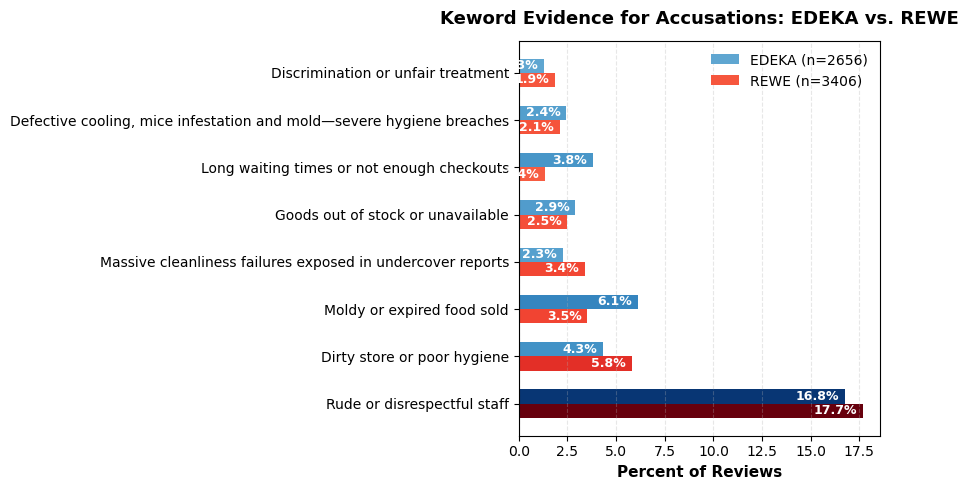

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# --- Data prep 
mask = (comparison['Store 1 %'] > 0) | (comparison['Store 2 %'] > 0)
comp = comparison[mask].copy()
comp['Total %'] = comp['Store 1 %'] + comp['Store 2 %']
comp = comp.nlargest(8, 'Total %').sort_values('Total %', ascending=True)  # top 8 for clarity
categories = comp.index
y = np.arange(len(categories))
bar_w = 0.30
max_pct = comp[['Store 1 %','Store 2 %']].values.max()

# Color gradients
cm_blue = cm.get_cmap('Blues')
cm_red  = cm.get_cmap('Reds')
blue_shades = [cm_blue(0.5 + 0.5*(v/max_pct)) for v in comp['Store 1 %']]
red_shades  = [cm_red( 0.5 + 0.5*(v/max_pct)) for v in comp['Store 2 %']]

# --- Plot ---
fig, ax = plt.subplots(figsize=(9, 5))

bars1 = ax.barh(y - bar_w/2, comp['Store 1 %'], height=bar_w,
                color=blue_shades, label=f"EDEKA (n={len(df1)})", edgecolor='none')
bars2 = ax.barh(y + bar_w/2, comp['Store 2 %'], height=bar_w,
                color=red_shades,  label=f"REWE (n={len(df2)})", edgecolor='none')

ax.invert_yaxis()
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_yticks(y)
ax.set_yticklabels(categories, fontsize=10)
ax.set_xlabel("Percent of Reviews", fontsize=11, fontweight='bold')
ax.set_title("Keword Evidence for Accusations: EDEKA vs. REWE", fontsize=13, fontweight='bold', pad=12)

# Annotate bars
for bars, color in zip([bars1, bars2], ['white','white']):
    for bar in bars:
        w = bar.get_width()
        if w >= 1.0:
            ax.text(w - 0.3, bar.get_y()+bar.get_height()/2,
                    f"{w:.1f}%", va='center', ha='right',
                    color=color, fontsize=9, fontweight='bold')
        elif w > 0:
            ax.text(w + 0.2, bar.get_y()+bar.get_height()/2,
                    f"{w:.1f}%", va='center', ha='left',
                    color='#333', fontsize=8)

# Legend in top-right
ax.legend(loc='upper right', fontsize=10, frameon=False)

plt.tight_layout()
plt.show()


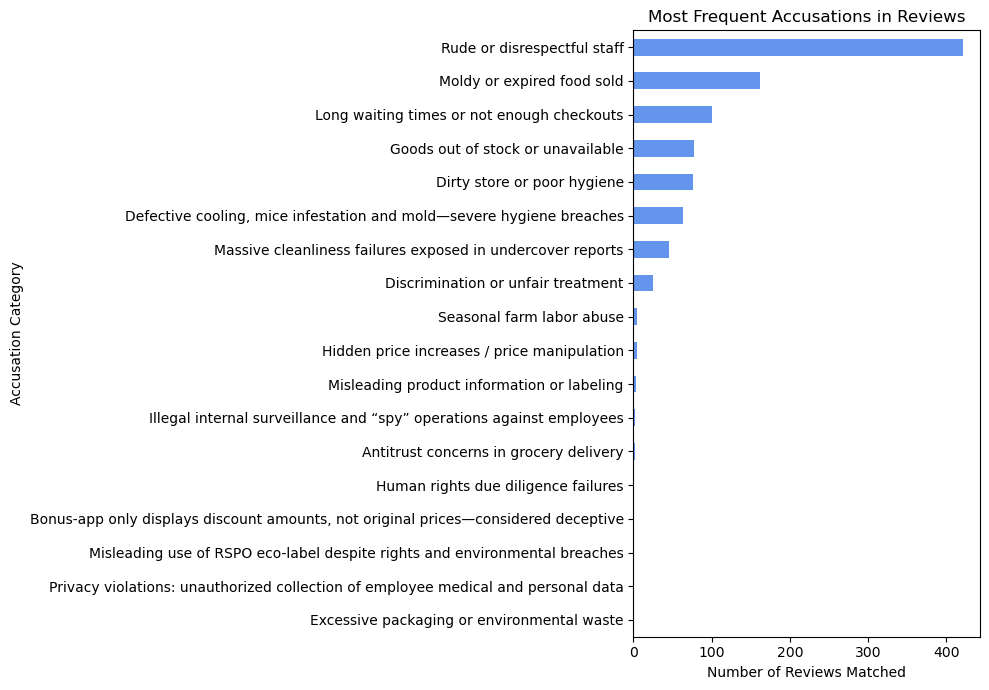

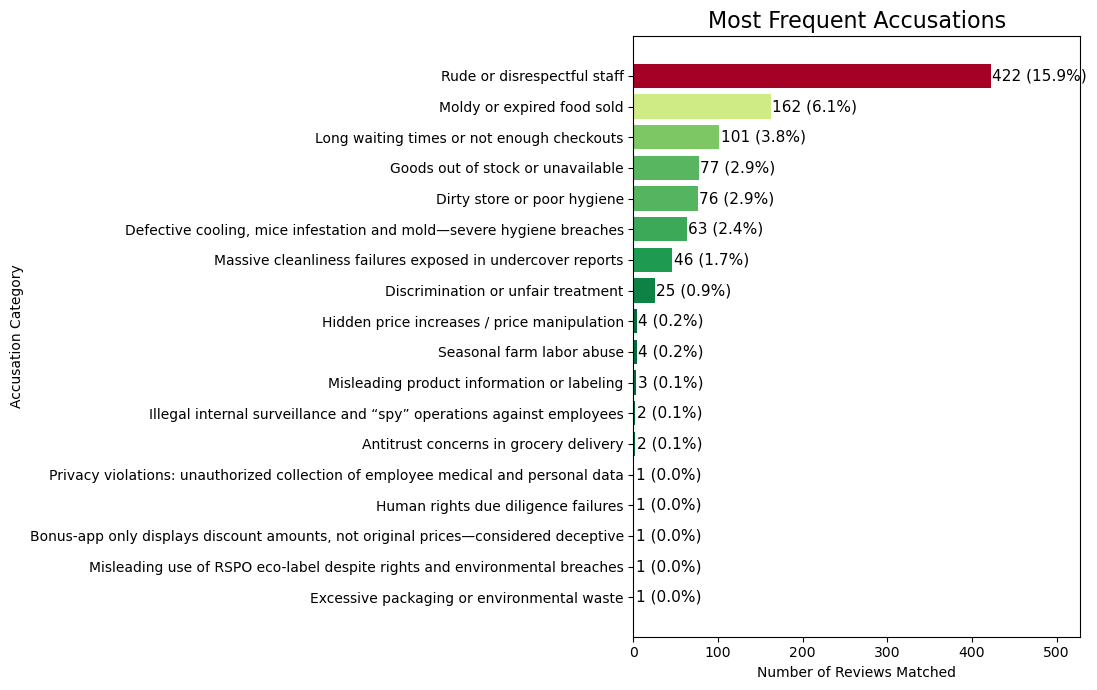

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


total_reviews = len(df)
category_counts = pd.Series(hits).sort_values(ascending=True)  # ascending for barh


percents = 100 * category_counts / total_reviews

norm = plt.Normalize(category_counts.min(), category_counts.max())
colors = plt.cm.RdYlGn_r(norm(category_counts.values))

fig, ax = plt.subplots(figsize=(11, 7))

bars = ax.barh(category_counts.index, category_counts.values, color=colors)


for bar, count, pct in zip(bars, category_counts.values, percents):
    ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, 
            f"{int(count)} ({pct:.1f}%)", va='center', fontsize=11)

ax.set_title("Most Frequent Accusations", fontsize=16)
ax.set_xlabel("Number of Reviews Matched")
ax.set_ylabel("Accusation Category")
plt.xlim(0, category_counts.max() * 1.25)
plt.tight_layout()
plt.show()
